In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [88]:
## Reading in Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape

(1460, 81)

In [89]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [90]:
## Features with Null Values
featureswith_na = [feature for feature in train.columns if train[feature].isnull().mean()>0.00]
for feature in featureswith_na:
    print("{0} has {1}% missing values".format(feature,round(100*(train[feature].isnull().mean()),2)))

LotFrontage has 17.74% missing values
Alley has 93.77% missing values
MasVnrType has 0.55% missing values
MasVnrArea has 0.55% missing values
BsmtQual has 2.53% missing values
BsmtCond has 2.53% missing values
BsmtExposure has 2.6% missing values
BsmtFinType1 has 2.53% missing values
BsmtFinType2 has 2.6% missing values
Electrical has 0.07% missing values
FireplaceQu has 47.26% missing values
GarageType has 5.55% missing values
GarageYrBlt has 5.55% missing values
GarageFinish has 5.55% missing values
GarageQual has 5.55% missing values
GarageCond has 5.55% missing values
PoolQC has 99.52% missing values
Fence has 80.75% missing values
MiscFeature has 96.3% missing values


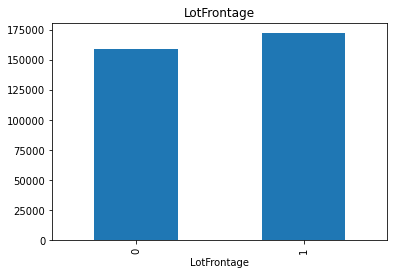

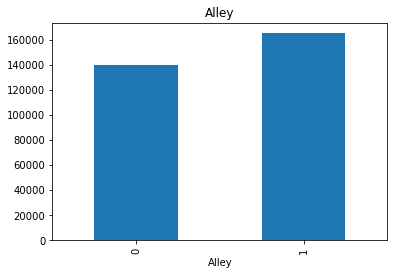

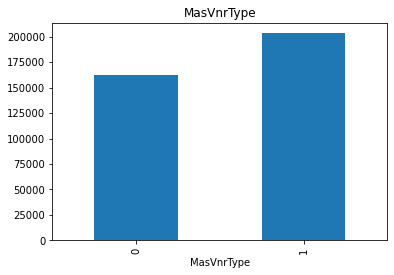

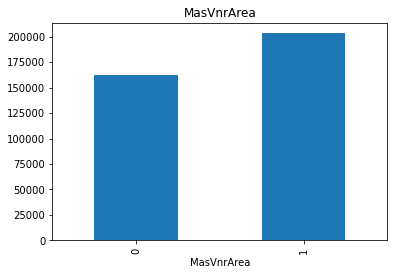

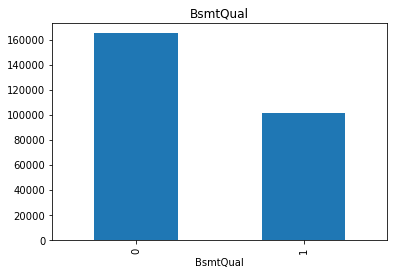

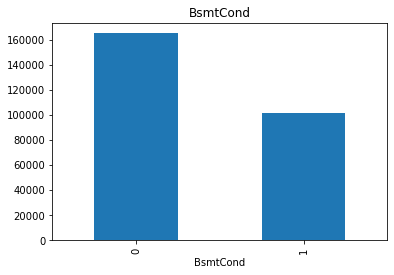

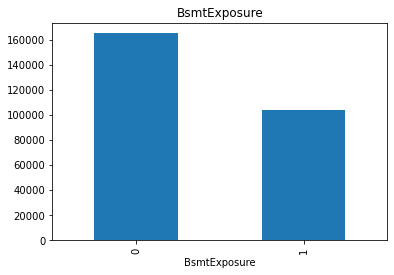

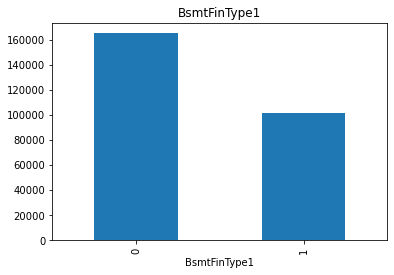

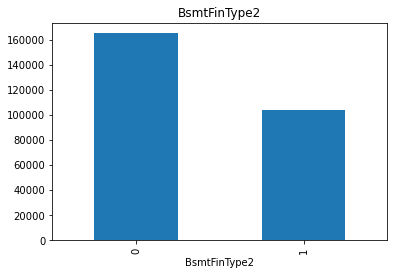

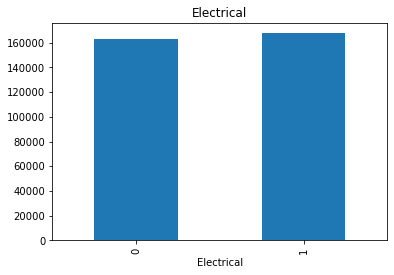

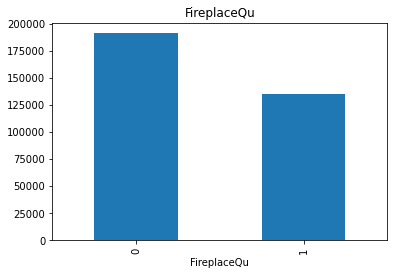

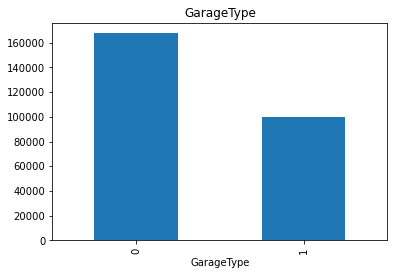

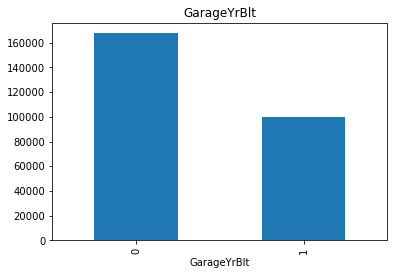

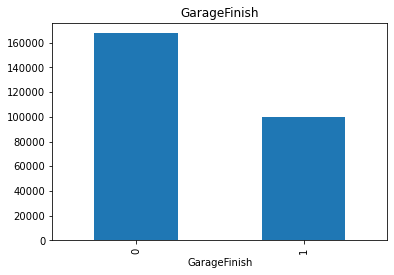

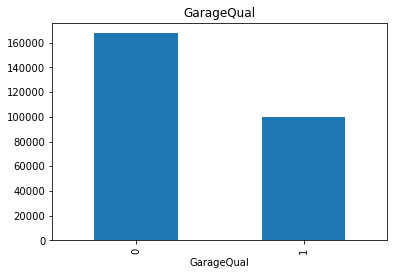

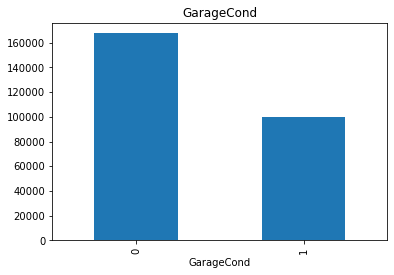

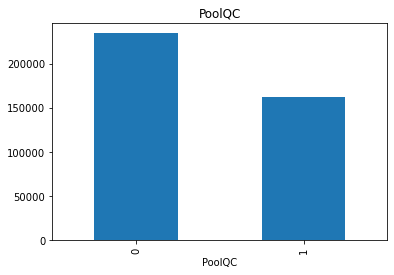

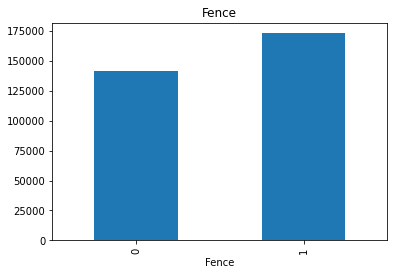

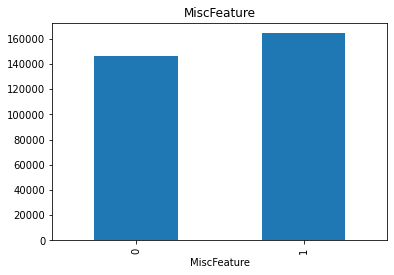

In [91]:
## Visualising if null values have any influence on Target Variable
for feature in featureswith_na:
    data = train.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

#### Thus, it is clearly visible that missing values has some sort of relationship with the target variables

In [92]:
## Numerical Variables
num_vars = [feature for feature in train.columns if train[feature].dtypes != "O" and feature != "Id"]
print ("The number of Numerical features is {}".format(len(num_vars)))
train[num_vars].head()

The number of Numerical features is 37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [93]:
## Temporal variables
year_vars = [feature for feature in num_vars if "Year" in feature or "Yr" in feature]
for feature in year_vars:
    print(feature, train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

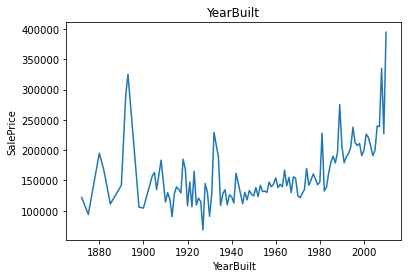

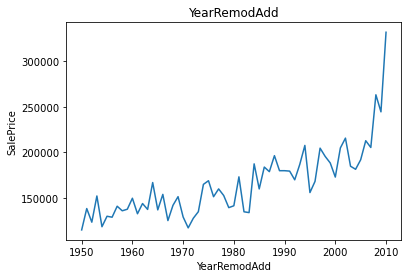

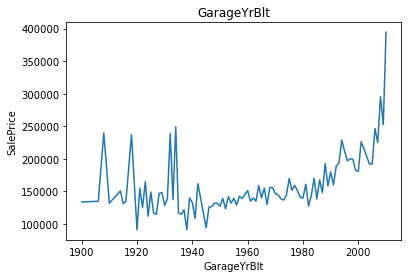

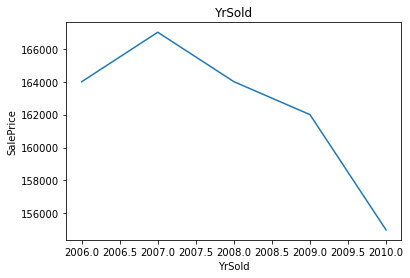

In [94]:
## Visualizing temporal Variables
for feature in year_vars:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.line()
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()

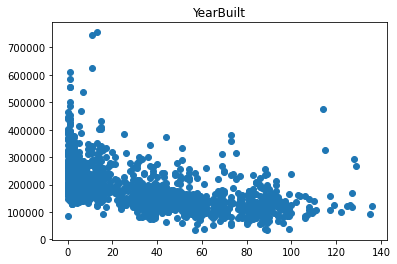

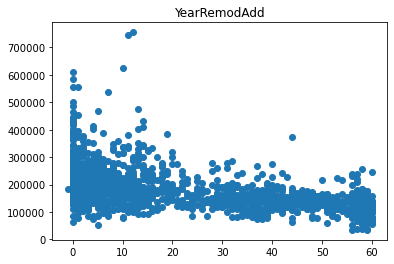

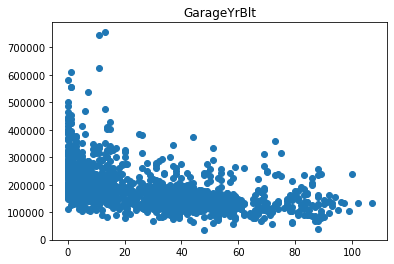

In [95]:
## Visualizing Temporal Variables as a difference fromYrSold
for feature in year_vars:
    if feature != "YrSold":
        data = train.copy()
        data[feature] = data["YrSold"] - data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.title(feature)
        plt.show()

In [96]:
## Discrete variables
discrete_vars = [feature for feature in num_vars if len(train[feature].unique())<25 and feature not in year_vars]
print("The number of Numerical Discrete features is {}".format(len(discrete_vars)))

The number of Numerical Discrete features is 17


In [97]:
train[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


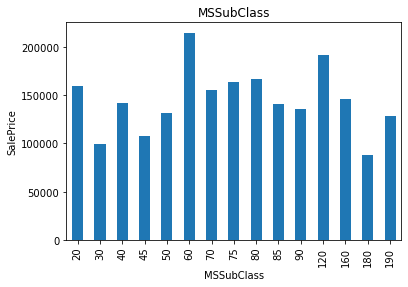

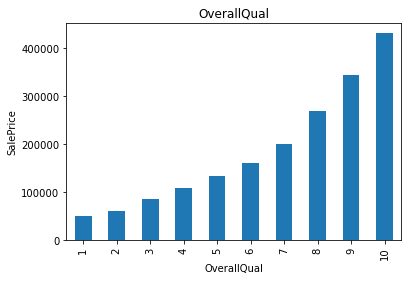

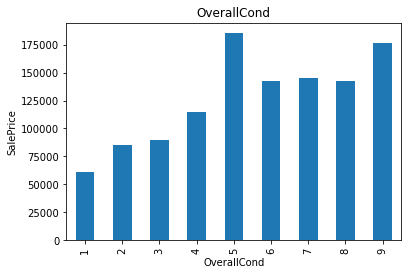

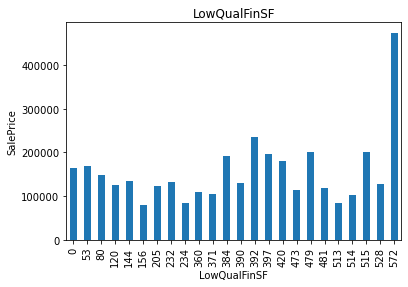

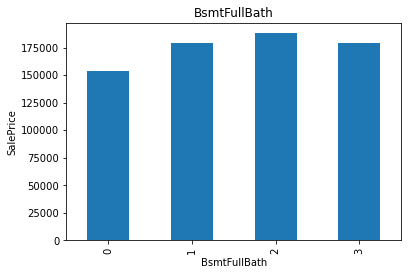

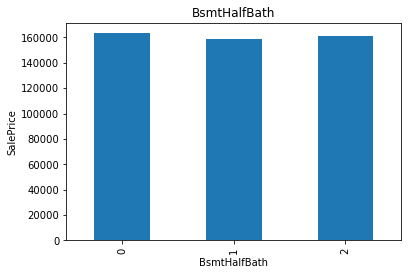

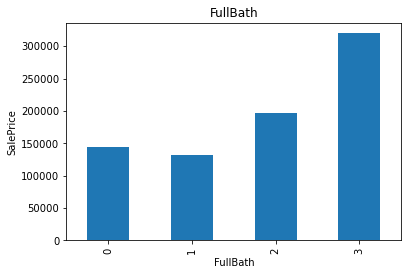

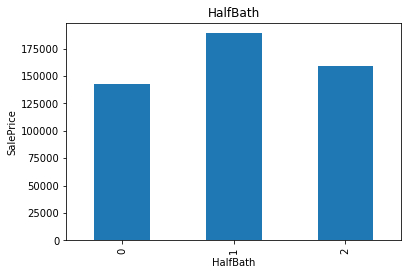

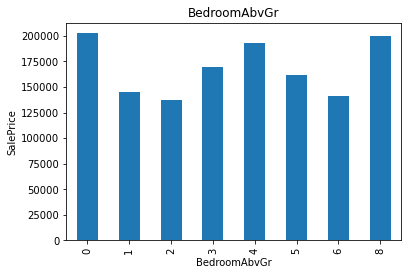

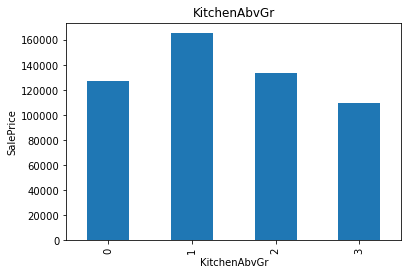

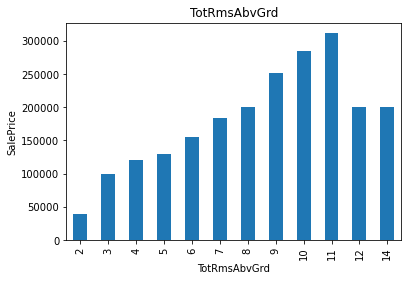

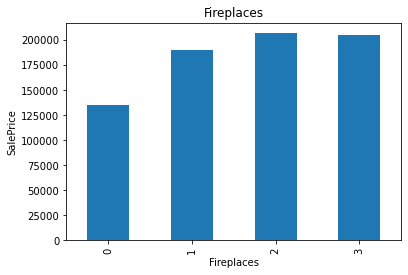

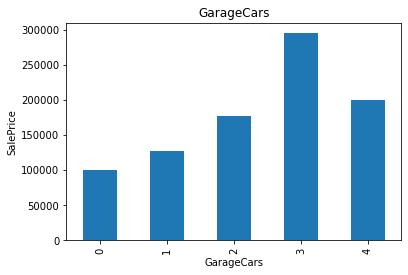

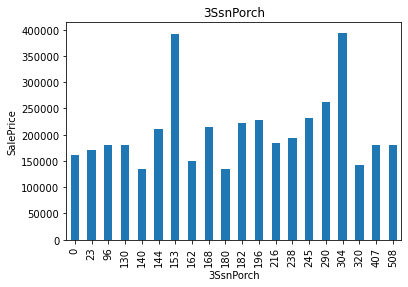

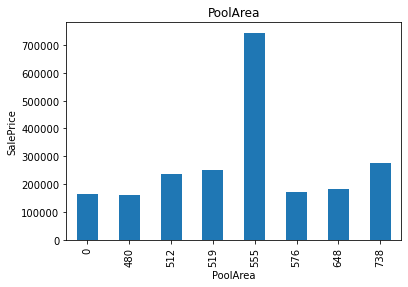

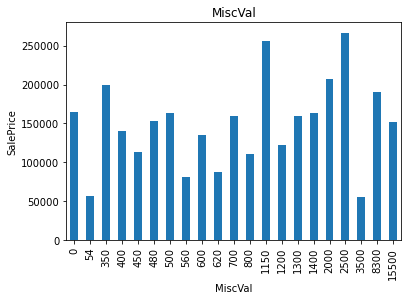

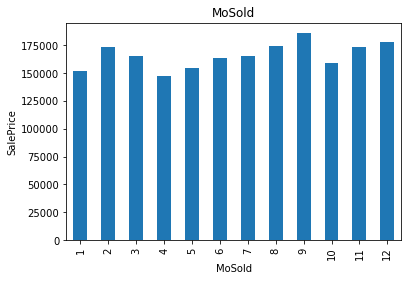

In [98]:
# Visualizing Discrete Vars
for feature in discrete_vars:
    data = train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.ylabel("SalePrice")
    plt.show()

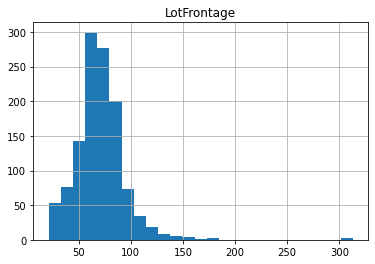

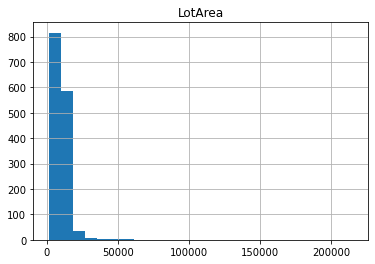

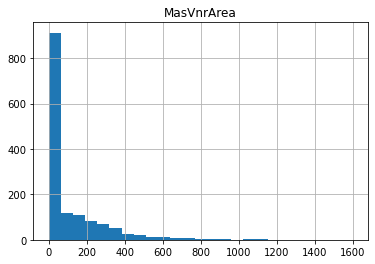

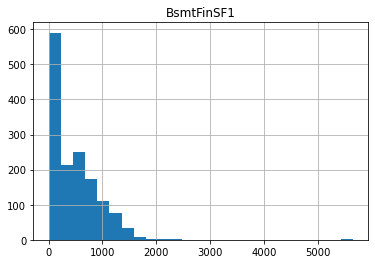

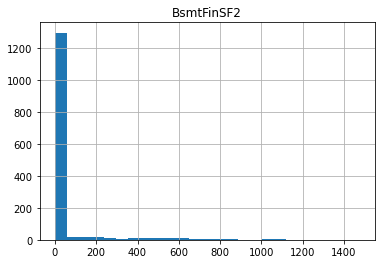

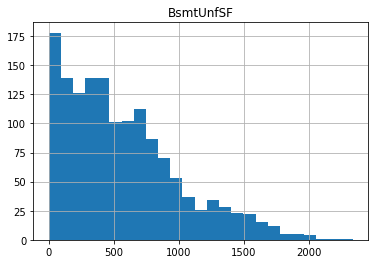

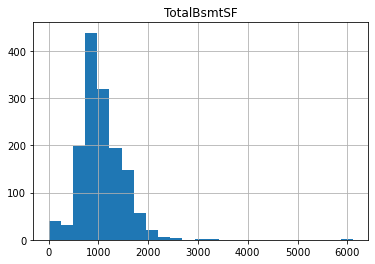

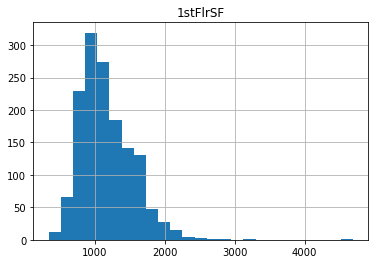

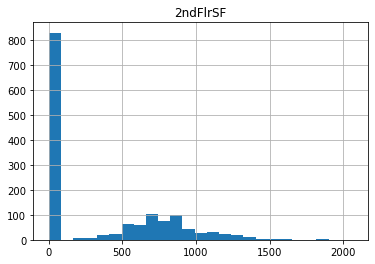

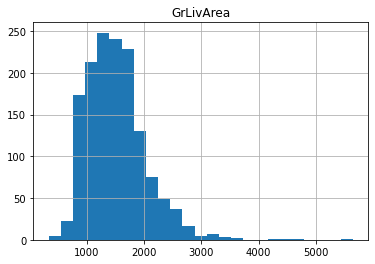

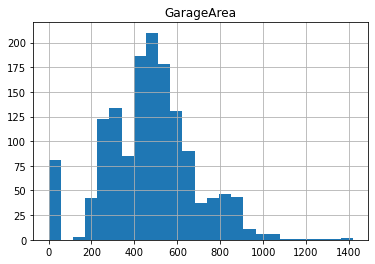

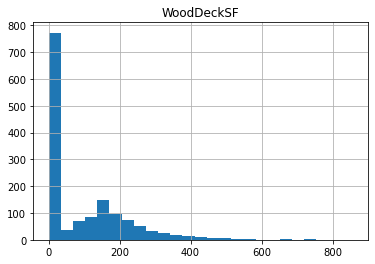

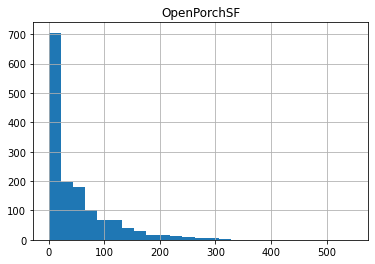

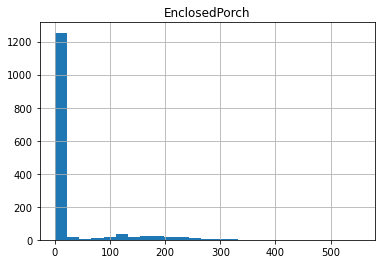

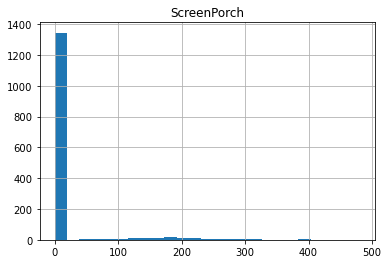

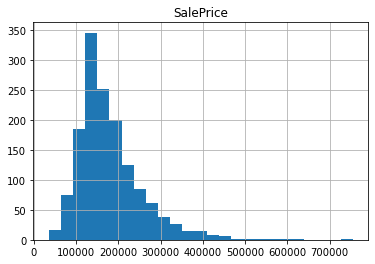

In [99]:
## Continuous vars
continuous_vars = [feature for feature in num_vars if feature not in year_vars+discrete_vars]
for feature in continuous_vars:
    data = train.copy() 
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

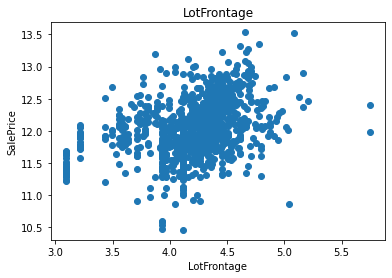

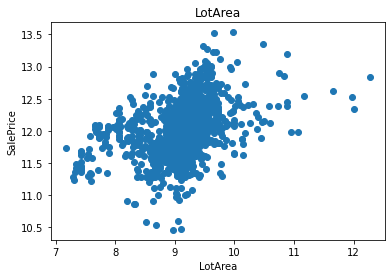

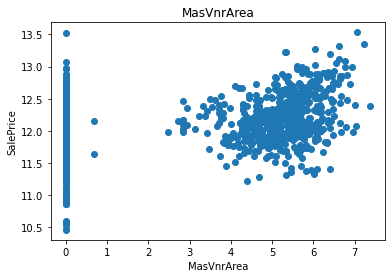

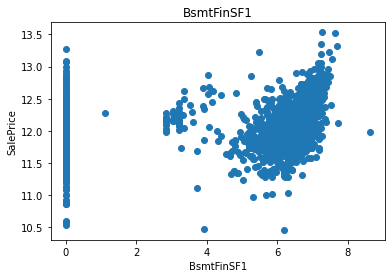

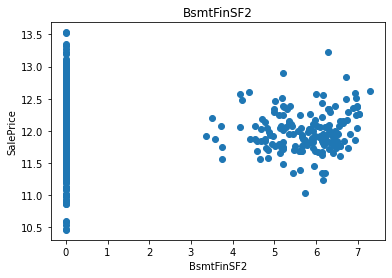

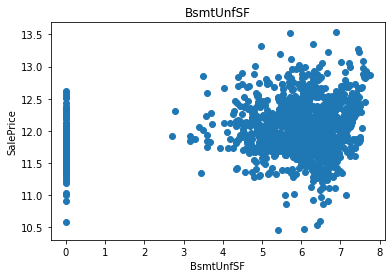

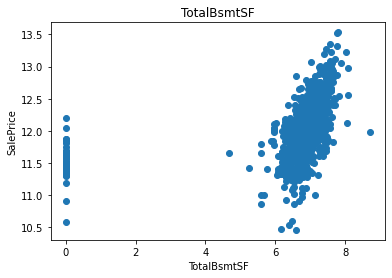

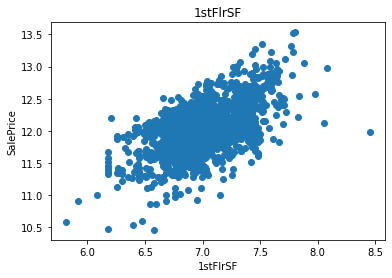

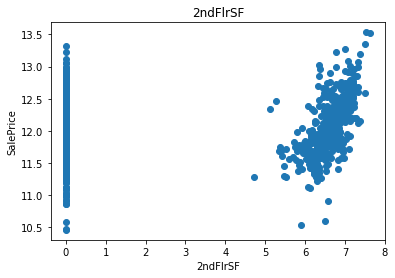

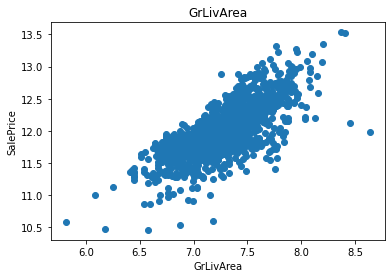

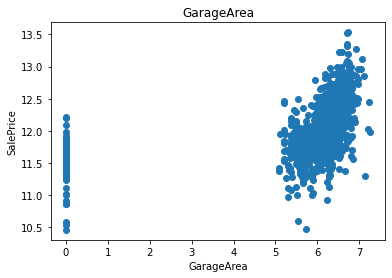

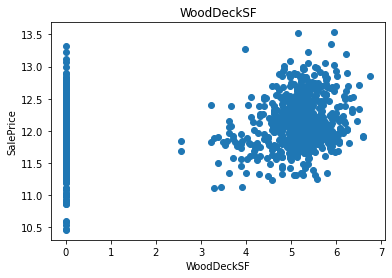

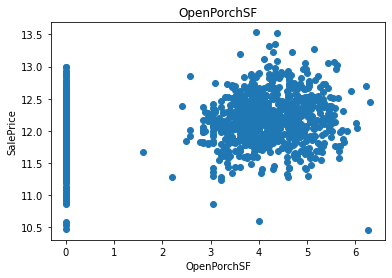

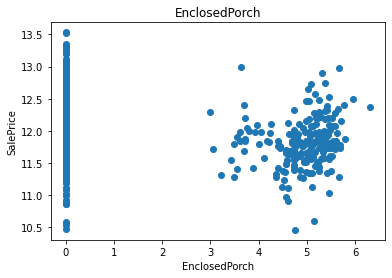

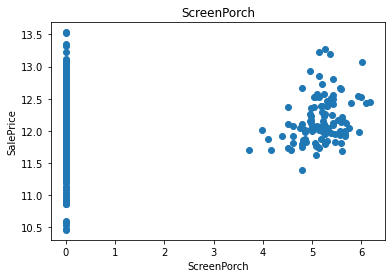

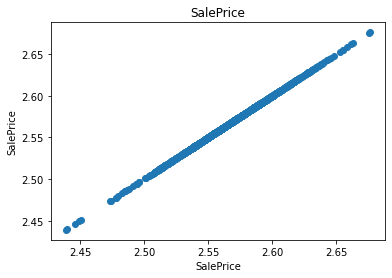

In [100]:
## After LogTransforming continuous Variables
for feature in continuous_vars:
    data = train.copy()
    data[feature] = np.log1p(data[feature])
    data['SalePrice'] = np.log1p(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

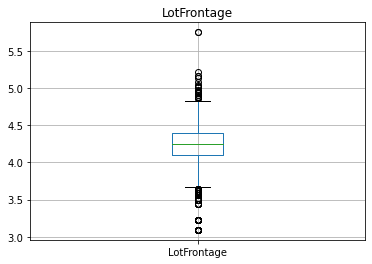

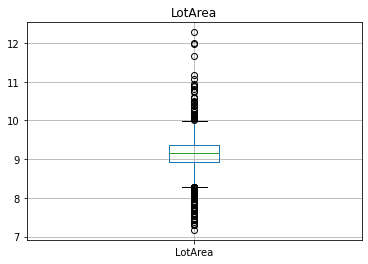

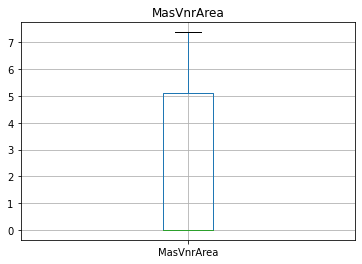

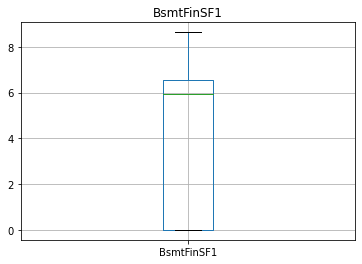

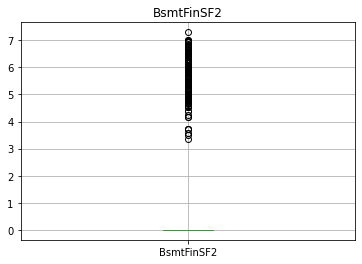

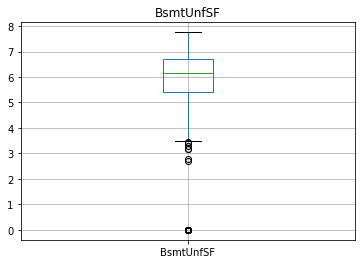

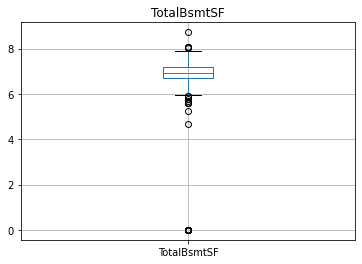

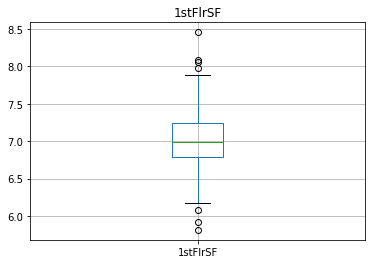

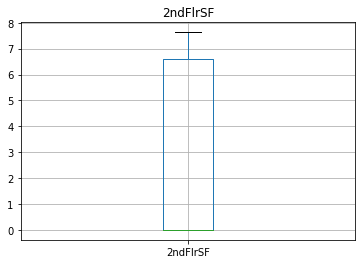

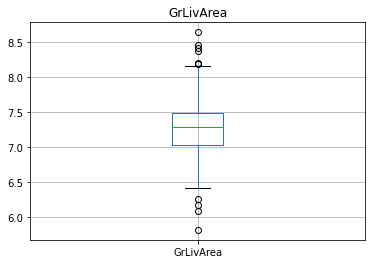

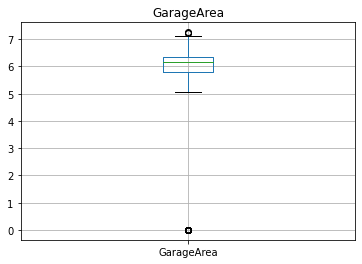

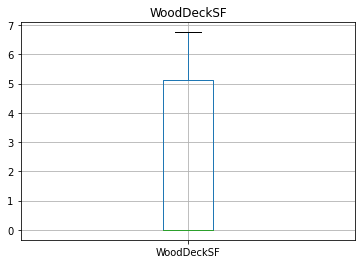

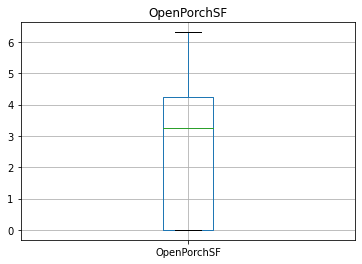

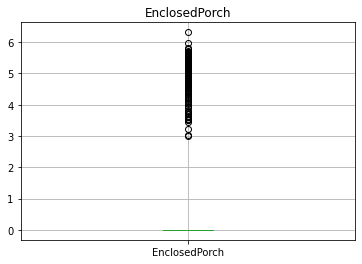

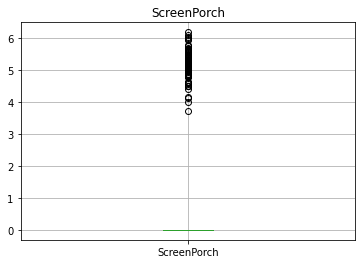

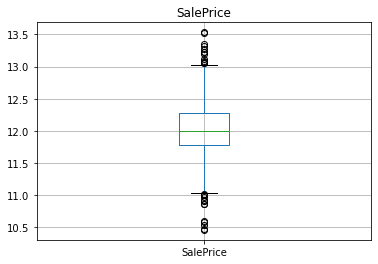

In [101]:
## Outlier presence in continuous
for feature in continuous_vars:
    data = train.copy()
    data[feature] = np.log1p(data[feature])
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

#### Outlier Presence in Continuous Variables

In [102]:
## Number of cardinal levels in Categorical Features
categorical_feature = [feature for feature in train.columns if train[feature].dtypes=='O']
for feature in categorical_feature:    
    print("The feature {0} has {1} cardinal levels".format(feature,len(train[feature].unique())))

The feature MSZoning has 5 cardinal levels
The feature Street has 2 cardinal levels
The feature Alley has 3 cardinal levels
The feature LotShape has 4 cardinal levels
The feature LandContour has 4 cardinal levels
The feature Utilities has 2 cardinal levels
The feature LotConfig has 5 cardinal levels
The feature LandSlope has 3 cardinal levels
The feature Neighborhood has 25 cardinal levels
The feature Condition1 has 9 cardinal levels
The feature Condition2 has 8 cardinal levels
The feature BldgType has 5 cardinal levels
The feature HouseStyle has 8 cardinal levels
The feature RoofStyle has 6 cardinal levels
The feature RoofMatl has 8 cardinal levels
The feature Exterior1st has 15 cardinal levels
The feature Exterior2nd has 16 cardinal levels
The feature MasVnrType has 5 cardinal levels
The feature ExterQual has 4 cardinal levels
The feature ExterCond has 5 cardinal levels
The feature Foundation has 6 cardinal levels
The feature BsmtQual has 5 cardinal levels
The feature BsmtCond has 5 

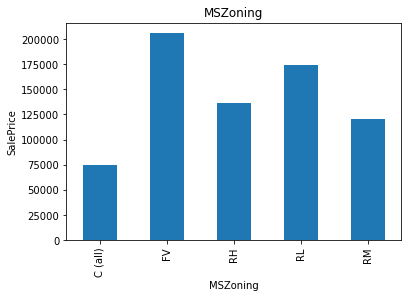

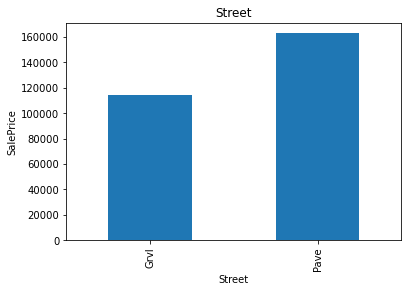

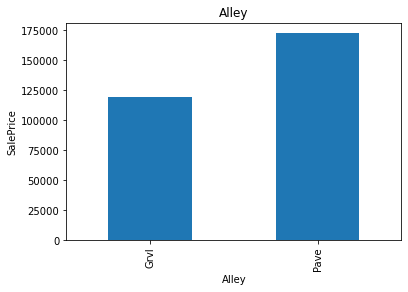

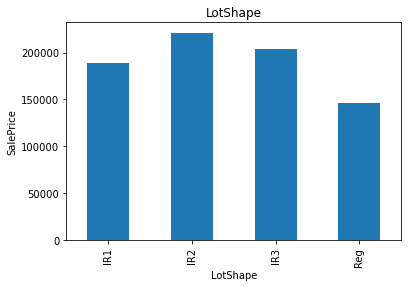

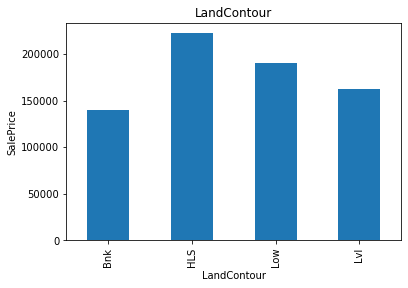

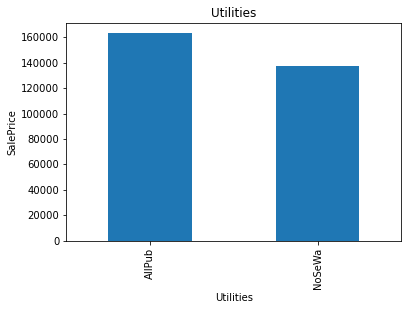

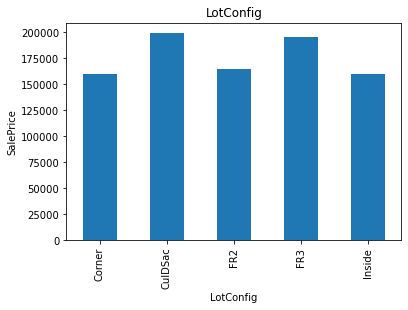

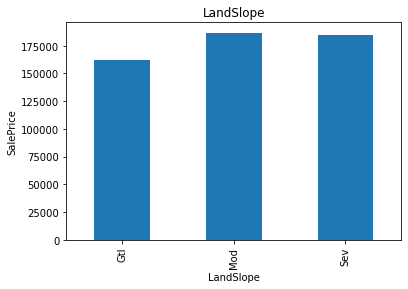

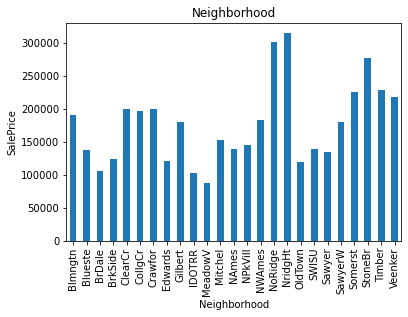

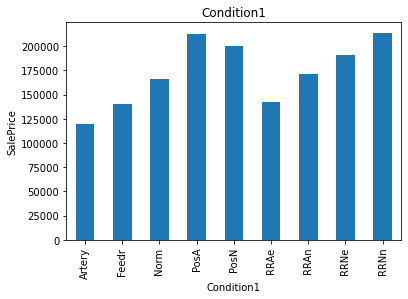

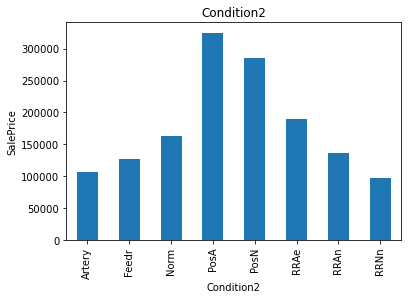

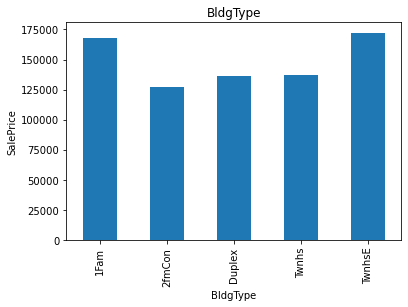

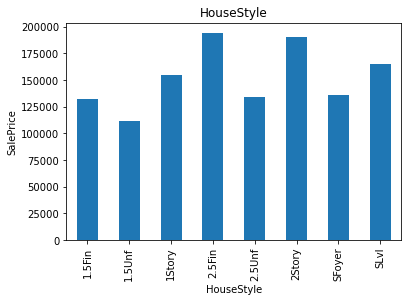

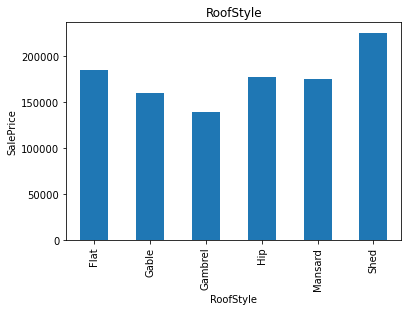

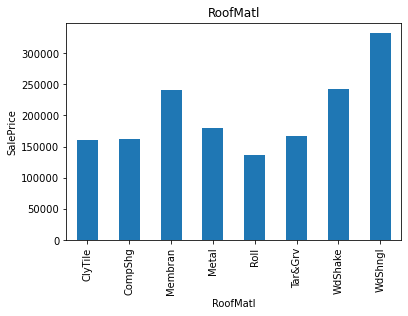

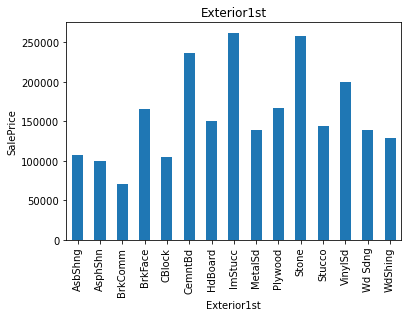

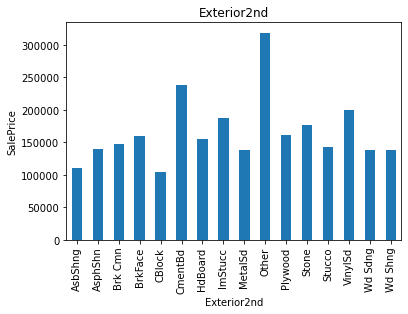

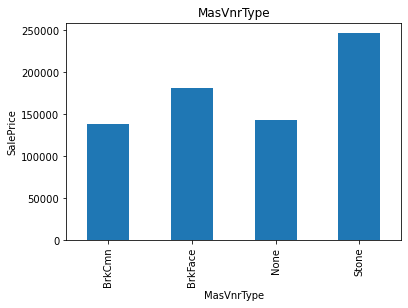

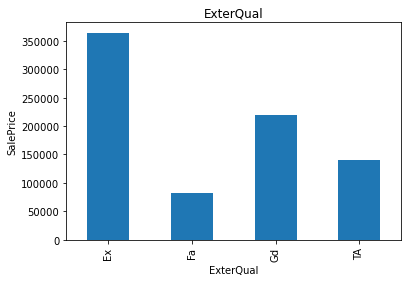

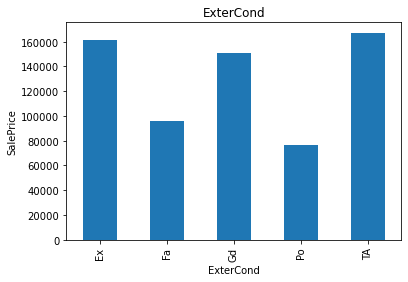

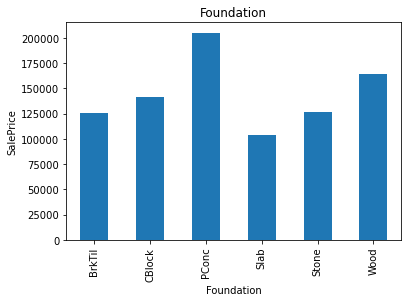

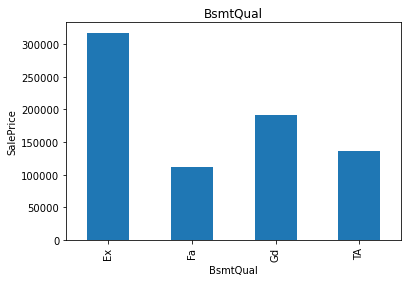

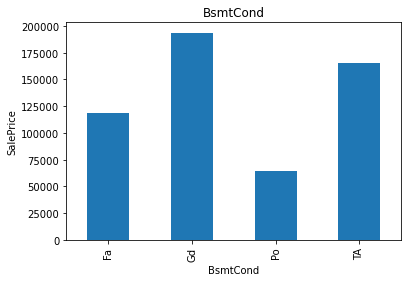

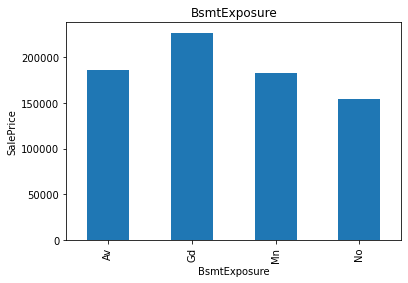

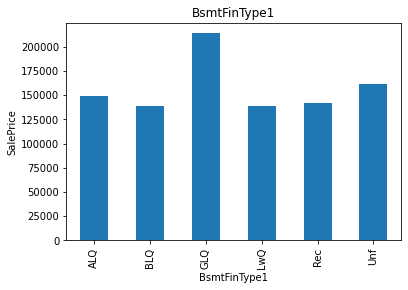

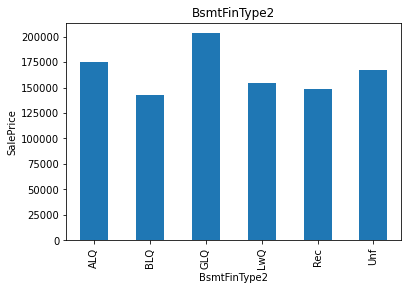

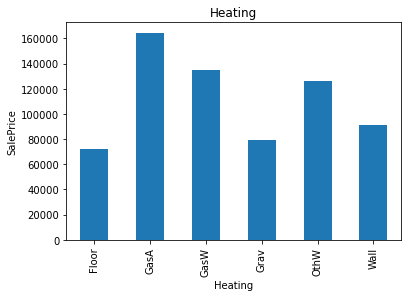

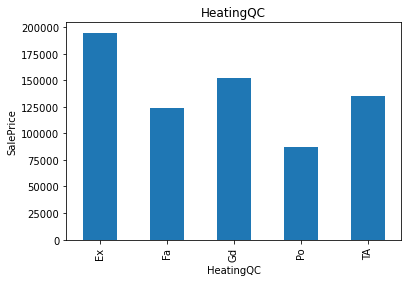

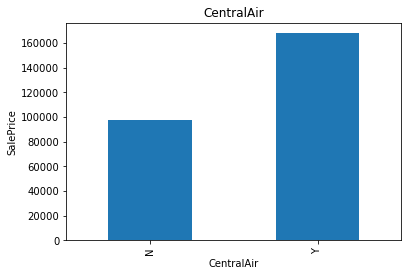

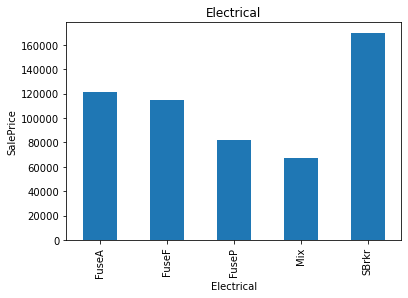

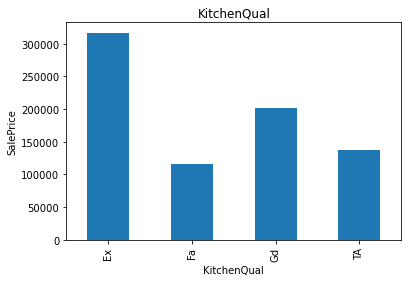

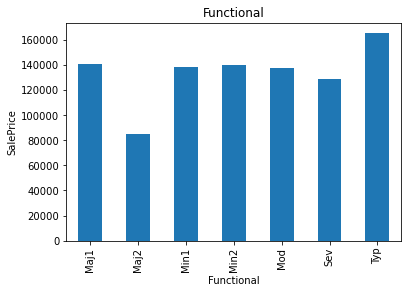

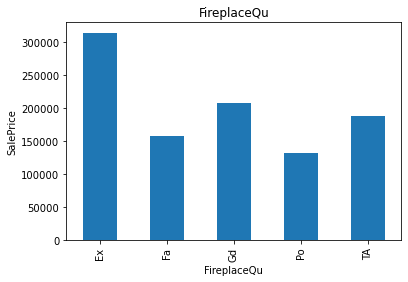

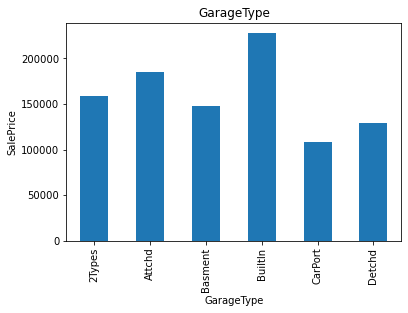

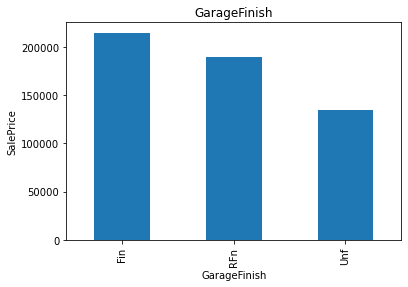

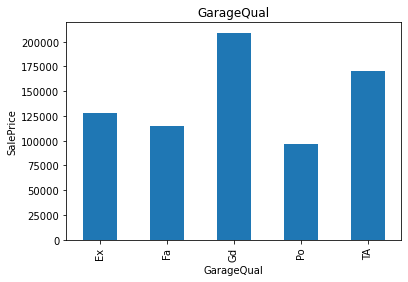

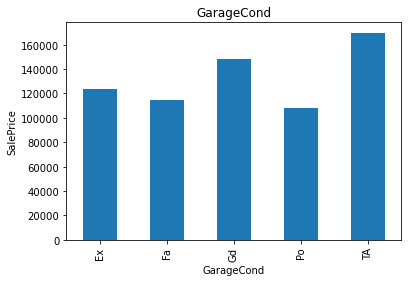

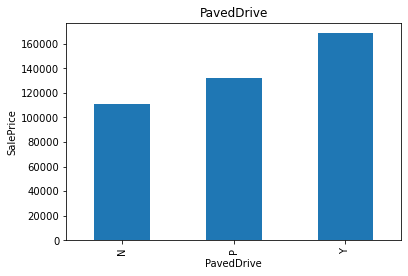

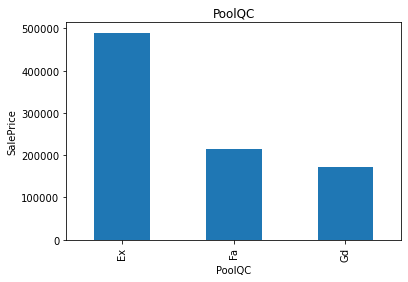

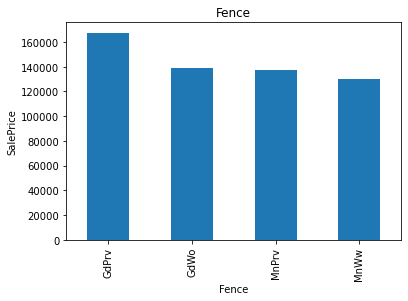

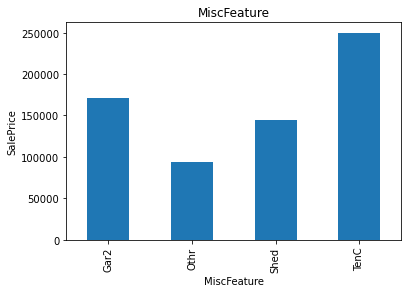

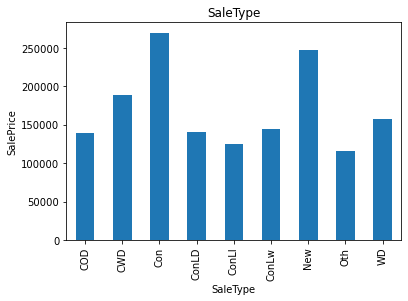

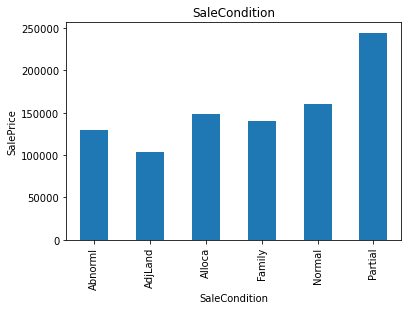

In [103]:
for feature in categorical_feature:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

In [104]:
for feature in featureswith_na:
    print("{0} has {1}% of missing values".format(feature,round((100*train[feature].isnull().mean()),2)))

LotFrontage has 17.74% of missing values
Alley has 93.77% of missing values
MasVnrType has 0.55% of missing values
MasVnrArea has 0.55% of missing values
BsmtQual has 2.53% of missing values
BsmtCond has 2.53% of missing values
BsmtExposure has 2.6% of missing values
BsmtFinType1 has 2.53% of missing values
BsmtFinType2 has 2.6% of missing values
Electrical has 0.07% of missing values
FireplaceQu has 47.26% of missing values
GarageType has 5.55% of missing values
GarageYrBlt has 5.55% of missing values
GarageFinish has 5.55% of missing values
GarageQual has 5.55% of missing values
GarageCond has 5.55% of missing values
PoolQC has 99.52% of missing values
Fence has 80.75% of missing values
MiscFeature has 96.3% of missing values


In [105]:
### Figuring out which of these are categorical features
cat_featureswithna = [feature for feature in train.columns if feature in categorical_feature and feature in featureswith_na]
for feature in cat_featureswithna:
    print(feature,"has",round(100*(train[feature].isnull().mean()),2),"% missing values")

Alley has 93.77 % missing values
MasVnrType has 0.55 % missing values
BsmtQual has 2.53 % missing values
BsmtCond has 2.53 % missing values
BsmtExposure has 2.6 % missing values
BsmtFinType1 has 2.53 % missing values
BsmtFinType2 has 2.6 % missing values
Electrical has 0.07 % missing values
FireplaceQu has 47.26 % missing values
GarageType has 5.55 % missing values
GarageFinish has 5.55 % missing values
GarageQual has 5.55 % missing values
GarageCond has 5.55 % missing values
PoolQC has 99.52 % missing values
Fence has 80.75 % missing values
MiscFeature has 96.3 % missing values


In [106]:
## Filling categorical missing values with another category
for feature in cat_featureswithna:
    train[feature] = train[feature].fillna("Missing")

In [107]:
## test data categorical features
test_na = [feature for feature in test.columns if test[feature].isnull().sum()>0]
for feature in test_na:
    print(feature,round(100*(test[feature].isnull().mean()),2))

MSZoning 0.27
LotFrontage 15.56
Alley 92.67
Utilities 0.14
Exterior1st 0.07
Exterior2nd 0.07
MasVnrType 1.1
MasVnrArea 1.03
BsmtQual 3.02
BsmtCond 3.08
BsmtExposure 3.02
BsmtFinType1 2.88
BsmtFinSF1 0.07
BsmtFinType2 2.88
BsmtFinSF2 0.07
BsmtUnfSF 0.07
TotalBsmtSF 0.07
BsmtFullBath 0.14
BsmtHalfBath 0.14
KitchenQual 0.07
Functional 0.14
FireplaceQu 50.03
GarageType 5.21
GarageYrBlt 5.35
GarageFinish 5.35
GarageCars 0.07
GarageArea 0.07
GarageQual 5.35
GarageCond 5.35
PoolQC 99.79
Fence 80.12
MiscFeature 96.5
SaleType 0.07


In [108]:
## Categorical in Test Data
test_cat = [feature for feature in test.columns if test[feature].dtypes=="O"]
test_cat_na = [feature for feature in test.columns if feature in test_na and feature in test_cat]

## Missing treatment for Test categorical features
for feature in test_cat_na:
    test[feature] = test[feature].fillna("Missing")

In [109]:
## Checking
for feature in cat_featureswithna:
    print(feature,"has",round(100*(train[feature].isnull().mean()),2),"% missing values")

Alley has 0.0 % missing values
MasVnrType has 0.0 % missing values
BsmtQual has 0.0 % missing values
BsmtCond has 0.0 % missing values
BsmtExposure has 0.0 % missing values
BsmtFinType1 has 0.0 % missing values
BsmtFinType2 has 0.0 % missing values
Electrical has 0.0 % missing values
FireplaceQu has 0.0 % missing values
GarageType has 0.0 % missing values
GarageFinish has 0.0 % missing values
GarageQual has 0.0 % missing values
GarageCond has 0.0 % missing values
PoolQC has 0.0 % missing values
Fence has 0.0 % missing values
MiscFeature has 0.0 % missing values


In [110]:
## Numerical Features with null values
num_na = [feature for feature in train.columns if feature in featureswith_na and feature in num_vars]
for feature in num_na:
    print(feature,"has",round(100*(train[feature].isnull().mean()),2),"% missing values")

LotFrontage has 17.74 % missing values
MasVnrArea has 0.55 % missing values
GarageYrBlt has 5.55 % missing values


In [111]:
## Replacing numerical nulls with median
for feature in num_na:
    med_val = train[feature].median()
    train[feature+'nan'] = np.where(train[feature].isnull(),1,0)
    train[feature] = train[feature].fillna(med_val)

In [112]:
## Test numerical
test_num = [feature for feature in test.columns if test[feature].dtypes!="O" and feature!="Id"]
test_num_na = [feature for feature in test.columns if feature in test_num and feature in test_na]
for feature in test_num_na:
    med_val = test[feature].median()
    test[feature+'nan'] = np.where(test[feature].isnull(),1,0)
    test[feature] = test[feature].fillna(med_val)

In [113]:
for feature in num_na:
    print(feature,"has",round(100*(train[feature].isnull().mean()),2),"% missing values")

LotFrontage has 0.0 % missing values
MasVnrArea has 0.0 % missing values
GarageYrBlt has 0.0 % missing values


In [114]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Mis

In [115]:
## Training data's temporal variables as a difference from Yr Sold
for feature in year_vars[:-1]:
    train[feature] = train['YrSold'] - train[feature]

In [116]:
## Test Temporal
for feature in year_vars[:-1]:
    test[feature] = test["YrSold"] - test[feature]

In [117]:
train[year_vars].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
5,16,14,16.0,2009
6,3,2,3.0,2007
7,36,36,36.0,2009
8,77,58,77.0,2008
9,69,58,69.0,2008


In [118]:
test[year_vars].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010
5,17,16,17.0,2010
6,18,3,18.0,2010
7,12,12,12.0,2010
8,20,20,20.0,2010
9,40,40,40.0,2010


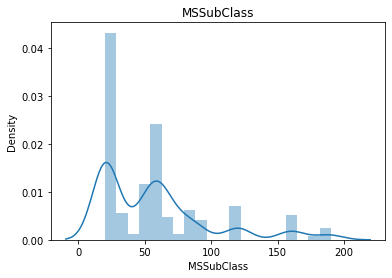

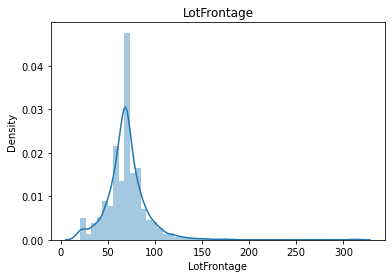

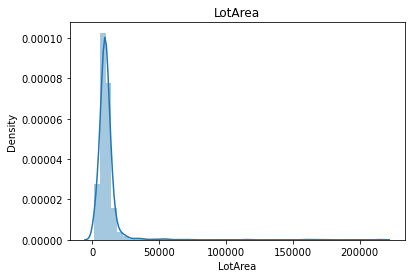

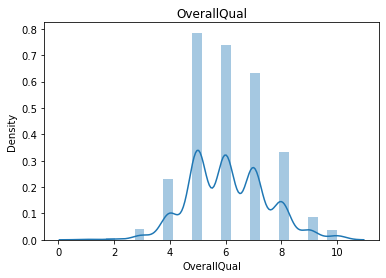

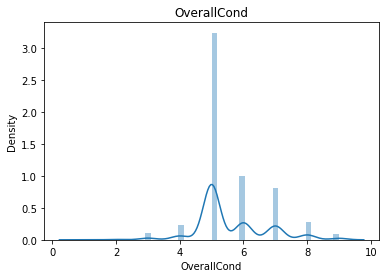

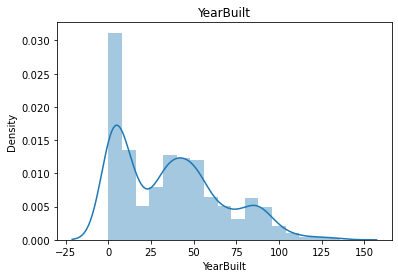

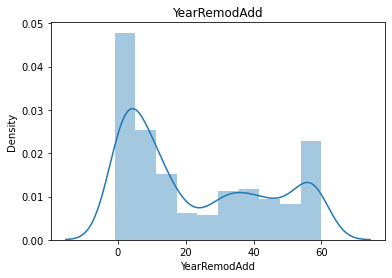

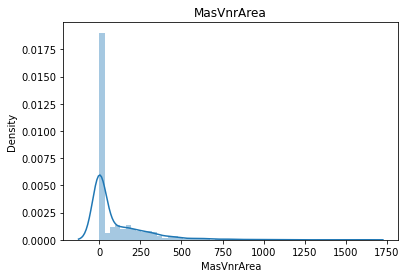

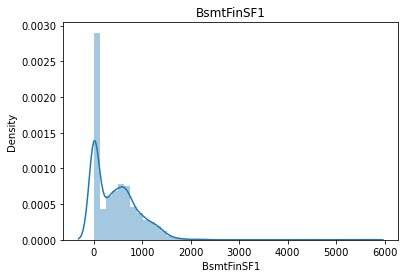

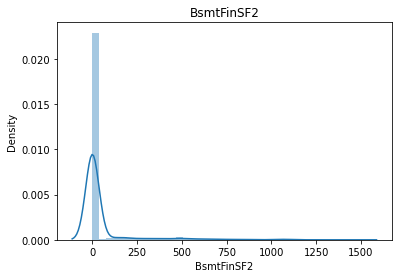

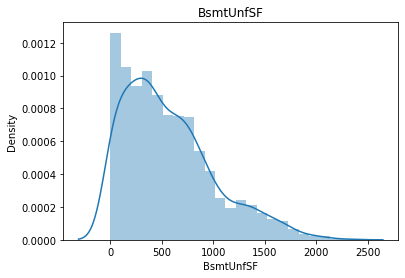

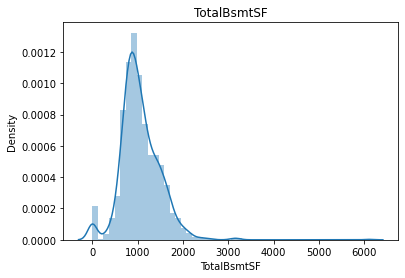

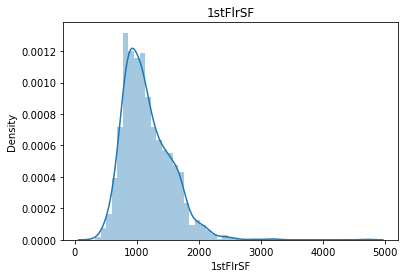

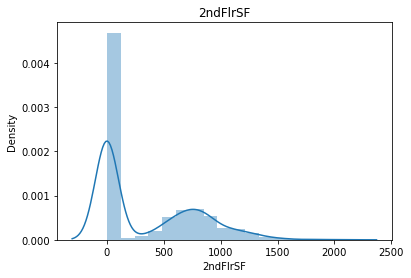

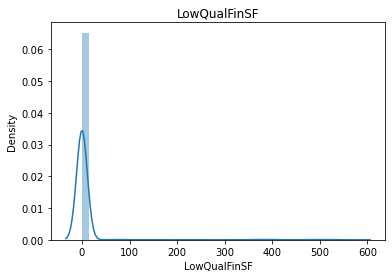

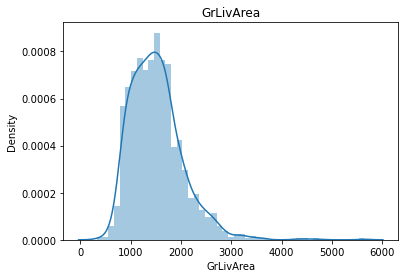

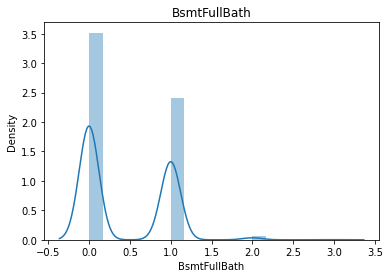

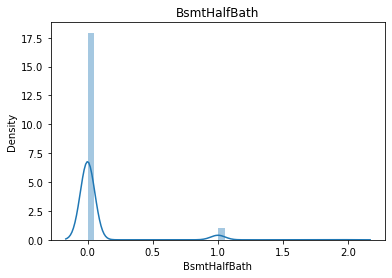

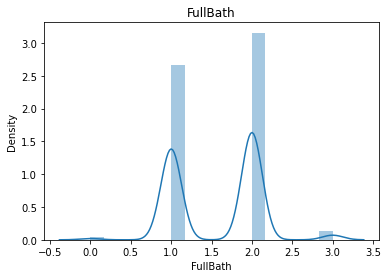

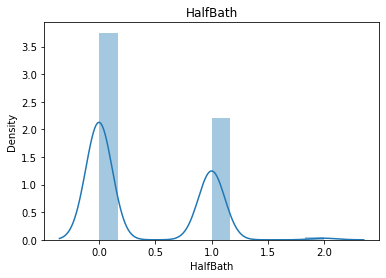

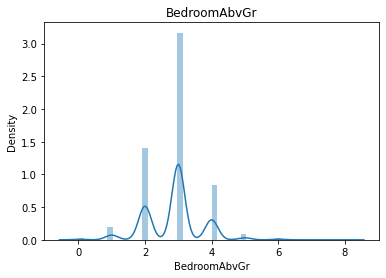

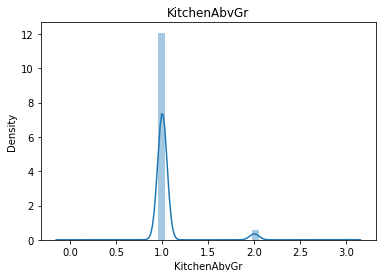

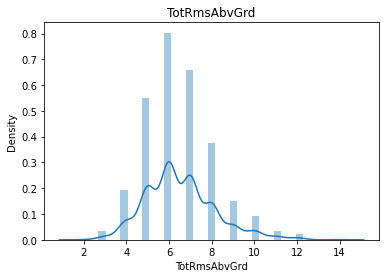

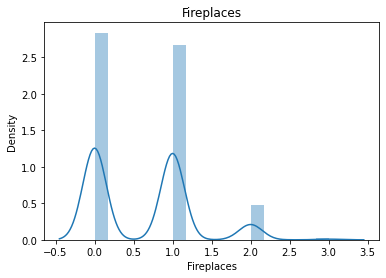

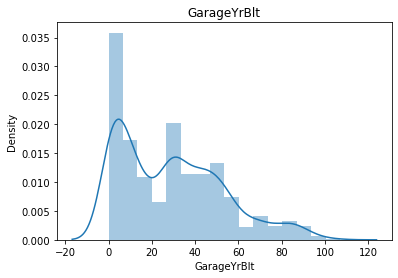

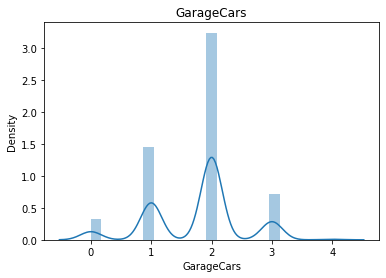

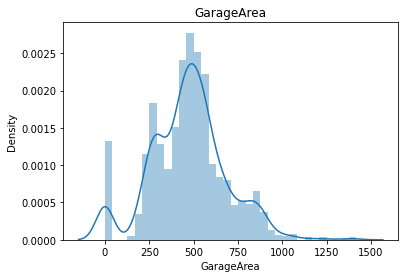

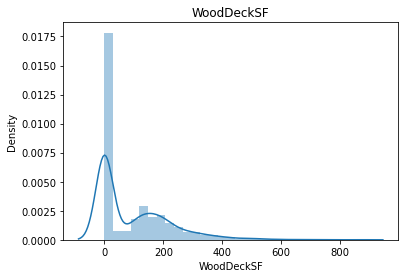

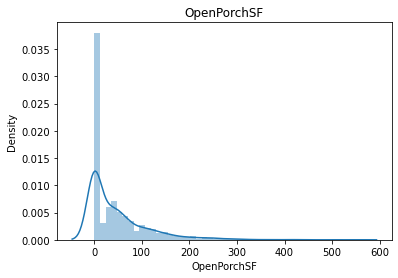

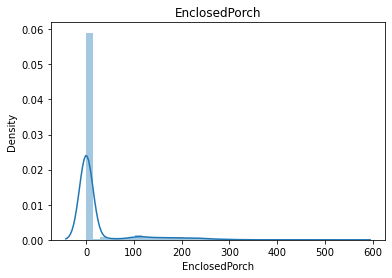

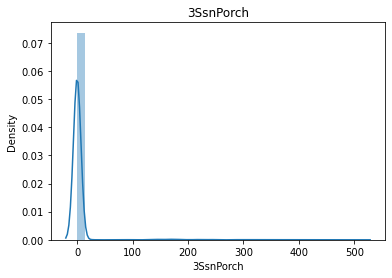

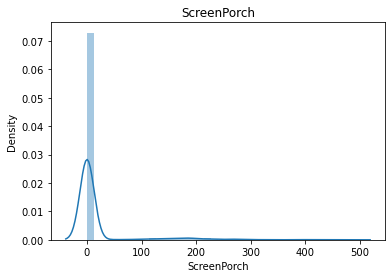

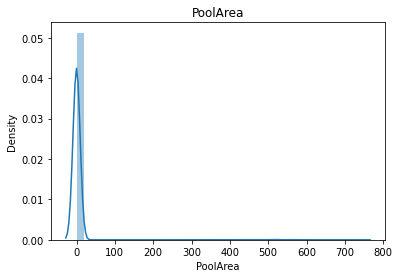

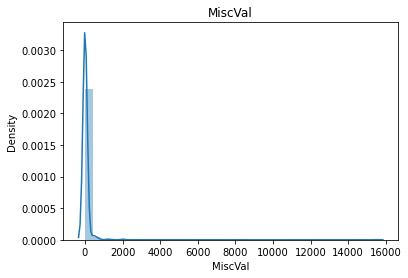

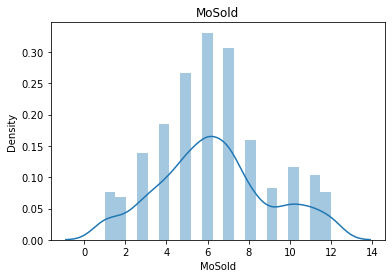

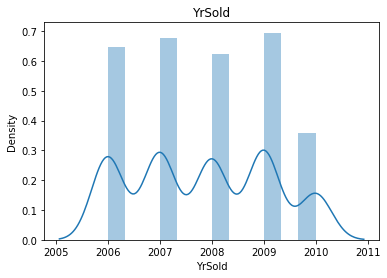

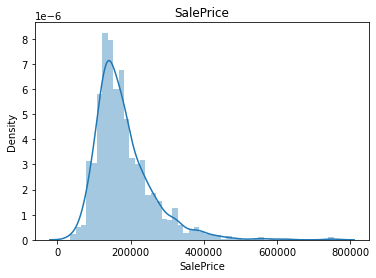

In [119]:
for feature in num_vars:
    sns.distplot(train[feature])
    plt.title(feature)
    plt.show()

In [120]:
## Train Rare values
for feature in categorical_feature:
    temp = train.groupby(feature)["SalePrice"].count()/len(train)
    temp_df = temp[temp>0.01].index
    train[feature] = np.where(train[feature].isin(temp_df),train[feature],"rare_var")

In [121]:
## Test Rare Value Treatment
for feature in test_cat:
    temp = test.groupby(feature)["Id"].count()/len(test)
    temp_df = temp[temp>0.01].index
    test[feature] = np.where(test[feature].isin(temp_df),test[feature],"rare_var")

In [122]:
train.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0

In [123]:
test.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,rare_var,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,rare_var,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
5,1466,60,RL,75.0,10000,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,17,16,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
6,1467,20,RL,67.0,7980,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,18,3,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0,0,0,0,0,0,0
7,1468,60,RL,63.0,8402,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,12,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
8,1469,20,RL,85.0,10176,Pav

In [124]:
## Label Encoding for both Train and test data
label = LabelEncoder()
for col in categorical_feature:
    label.fit(pd.concat([train[col],test[col]],axis=0,sort=False))
    train[col] = label.transform(train[col])
    test[col] = label.transform(test[col])

In [125]:
## Making Copies of train and test data for other Algorithms
train2 = train.copy()
test2 = test.copy()

In [126]:
## Log Transformation for Training Data features
num_vars2 = ['LotFrontage', 'LotArea','1stFlrSF','GrLivArea','SalePrice']
for feature in num_vars2:
    train[feature] = np.log1p(train[feature])

In [127]:
## Test Log Transformation
for feature in num_vars2[:-1]:
    test[feature] = np.log1p(test[feature])

In [128]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,5,4.394449,9.360741,0,1,2,3,0,3,0,11,1,0,0,1,5,6,49,49,0,0,7,8,3,0.0,3,2,1,4,3,4,5,468.0,3,144.0,270.0,882.0,0,3,1,2,6.799056,0,0,6.799056,0.0,0.0,1,0,2,1,3,5,3,0,3,1,49.0,3,1.0,730.0,2,2,2,140,0,0,0,120,0,0,3,0,0,6,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,3,4.406719,9.565775,0,1,0,3,0,0,0,11,2,0,0,1,6,6,52,52,1,0,8,9,1,108.0,3,2,1,4,3,4,0,923.0,6,0.0,406.0,1329.0,0,3,1,2,7.192934,0,0,7.192934,0.0,0.0,1,1,3,1,2,6,3,0,3,1,52.0,3,1.0,312.0,2,2,2,393,36,0,0,0,0,0,2,2,12500,6,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,3,4.317488,9.534668,0,1,0,3,0,3,0,7,2,0,0,2,5,5,13,12,0,0,7,8,3,0.0,3,2,2,2,3,4,2,791.0,6,0.0,137.0,928.0,0,2,1,2,6.834109,701,0,7.396335,0.0,0.0,2,1,3,1,3,6,3,1,5,1,13.0,0,2.0,482.0,2,2,2,212,34,0,0,0,0,0,3,0,0,3,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,3,4.369448,9.208238,0,1,0,3,0,3,0,7,2,0,0,2,6,6,12,12,0,0,7,8,1,20.0,3,2,2,4,3,4,2,602.0,6,0.0,324.0,926.0,0,0,1,2,6.831954,678,0,7.380879,0.0,0.0,2,1,3,1,2,7,3,1,2,1,12.0,0,2.0,470.0,2,2,2,360,36,0,0,0,0,0,2,0,0,6,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,3,3.784190,8.518392,0,1,0,1,0,3,0,20,2,0,4,1,8,5,18,18,0,0,3,4,3,0.0,2,2,2,2,3,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,2,7.155396,0,0,7.155396,0.0,0.0,2,0,2,1,2,5,3,0,3,1,18.0,2,2.0,506.0,2,2,2,0,82,0,0,144,0,0,2,0,0,1,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
5,1466,60,3,4.330733,9.210440,0,1,0,3,0,0,0,7,2,0,0,2,6,5,17,16,0,0,3,4,3,0.0,3,2,2,2,3,4,6,0.0,6,0.0,763.0,763.0,0,2,1,2,6.638568,892,0,7.412160,0.0,0.0,2,1,3,1,3,7,3,1,5,1,17.0,0,2.0,440.0,2,2,2,157,84,0,0,0,0,0,2,0,0,4,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
6,1467,20,3,4.219508,8.984819,0,1,0,3,0,3,0,7,2,0,0,1,6,7,18,3,0,0,3,4,3,0.0,3,1,2,2,3,4,0,935.0,6,0.0,233.0,1168.0,0,0,1,2,7.080026,0,0,7.080026,1.0,0.0,2,0,3,1,3,6,3,0,3,1,18.0,0,2.0,420.0,2,2,2,483,21,0,0,0,0,0,0,1,500,3,2010,3,2,1,0,0,0,0,0,0,0,0,0,0
7,1468,60,3,4.158883,9.036344,0,1,0,3,0,3,0,7,2,0,0,2,6,5,12,12,0,0,7,8,3,0.0,3,2,2,2,3,4,6,0.0,6,0.0,789.0,789.0,0,2,1,2,6.672033,676,0,7.290293,0.0,0.0,2,1,3,1,3,7,3,1,2,1,12.0,0,2.0,393.0,2,2,2,0,75,0,0,0,0,0,2,0,0,5,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
8,1469,20,3,4.454347,9.227886,0,1,2,3,0,3,0,7,2,0,0,1,7,5,20,20,0,0,3,4,3,0.0,3,2,2,2,3,1,2,637.0,6,0.0,663.0,1300.0,0,2,1,2,7.201916,0,0,7.201916,1.0,0.0,1,1,2,1,2,5,3,1,4,1,20.0,3,2.0,506.0,2,2,2,192,0,0,0,0,0,0,2,0,0,2,2010,3,2,0,0,0,0,0,0,0,0,0,0,0
9,1470,20,3,4.262680,9.036106,0,1,2,3,0,0,0,11,2,0,0,1,4,5,40,40,0,0,5,6,3,0.0,3,2,1,4,3,4,0,804.0,5,78.0,0.0,882.0,0,3,1,2,6.783325,0,0,6.783325,1.0,0.0,1,0,2,1,3,4,3,0,3,1,40.0,0,2.0,525.0,2,2,2,240,0,0,0,0,0,0,3,0,0,4,2010,3,2,0,0,0,0,0,0,0,0,0,0,0


In [129]:
## Num features scaling
scaler = MinMaxScaler()
feature_scale = [feature for feature in train.columns if feature != "Id"and feature !="SalePrice"]
for feature in feature_scale:
    scaler.fit(pd.concat([train[feature],test[feature]],axis=0,sort=False).values.reshape(-1, 1))
    train[feature] = scaler.transform(train[feature].values.reshape(-1,1))
    test[feature] = scaler.transform(test[feature].values.reshape(-1,1))

In [130]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,0.000000,1.0,0.490307,0.428656,0.0,0.5,0.666667,1.000000,0.0,0.75,0.0,0.500000,0.166667,0.0,0.0,0.2,0.444444,0.625,0.364964,0.822581,0.0,0.0,0.7,0.727273,0.6,0.0000,0.75,0.666667,0.25,1.0,0.75,1.0,0.833333,0.082920,0.428571,0.094364,0.115582,0.144354,0.0,0.75,1.0,0.666667,0.361828,0.000000,0.0,0.348765,0.0,0.0,0.25,0.0,0.250,0.333333,0.75,0.230769,0.75,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,0.666667,0.666667,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0
1,1462,0.000000,0.6,0.494922,0.468791,0.0,0.5,0.000000,1.000000,0.0,0.00,0.0,0.500000,0.333333,0.0,0.0,0.2,0.555556,0.625,0.386861,0.870968,0.5,0.0,0.8,0.818182,0.2,0.0675,0.75,0.666667,0.25,1.0,0.75,1.0,0.000000,0.163536,0.857143,0.000000,0.173801,0.217512,0.0,0.75,1.0,0.666667,0.506526,0.000000,0.0,0.488238,0.0,0.0,0.25,0.5,0.375,0.333333,0.50,0.307692,0.75,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,0.666667,0.666667,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,1.0,0.735294,0.454545,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0
2,1463,0.235294,0.6,0.461356,0.462701,0.0,0.5,0.000000,1.000000,0.0,0.75,0.0,0.318182,0.333333,0.0,0.0,0.4,0.444444,0.500,0.102190,0.225806,0.0,0.0,0.7,0.727273,0.6,0.0000,0.75,0.666667,0.50,0.5,0.75,1.0,0.333333,0.140149,0.857143,0.000000,0.058647,0.151882,0.0,0.50,1.0,0.666667,0.374705,0.339467,0.0,0.560263,0.0,0.0,0.50,0.5,0.375,0.333333,0.75,0.307692,0.75,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,0.666667,0.666667,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.75,0.0,0.000000,0.181818,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0
3,1464,0.235294,0.6,0.480902,0.398804,0.0,0.5,0.000000,1.000000,0.0,0.75,0.0,0.318182,0.333333,0.0,0.0,0.4,0.555556,0.625,0.094891,0.225806,0.0,0.0,0.7,0.727273,0.2,0.0125,0.75,0.666667,0.50,1.0,0.75,1.0,0.333333,0.106662,0.857143,0.000000,0.138699,0.151555,0.0,0.00,1.0,0.666667,0.373914,0.328329,0.0,0.554790,0.0,0.0,0.50,0.5,0.375,0.333333,0.50,0.384615,0.75,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,0.666667,0.666667,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0
4,1465,0.588235,0.6,0.260743,0.263769,0.0,0.5,0.000000,0.333333,0.0,0.75,0.0,0.909091,0.333333,0.0,1.0,0.2,0.777778,0.500,0.138686,0.322581,0.0,0.0,0.3,0.363636,0.6,0.0000,0.50,0.666667,0.50,0.5,0.75,1.0,0.000000,0.046598,0.857143,0.000000,0.435360,0.209493,0.0,0.00,1.0,0.666667,0.492735,0.000000,0.0,0.474946,0.0,0.0,0.50,0.0,0.250,0.333333,0.50,0.230769,0.75,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,0.666667,0.666667,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.50,0.0,0.000000,0.000000,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0


In [131]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,0.235294,0.6,0.413268,0.366271,0.0,0.5,0.666667,1.0,0.0,0.75,0.0,0.181818,0.333333,0.0,0.0,0.4,0.666667,0.500,0.043796,0.112903,0.0,0.0,0.7,0.727273,0.2,0.12250,0.50,0.666667,0.50,0.5,0.75,1.00,0.333333,0.125089,0.857143,0.0,0.064212,0.140098,0.0,0.0,1.0,0.666667,0.345070,0.413559,0.0,0.577436,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.461538,0.75,0.00,0.6,0.166667,0.652866,0.666667,0.4,0.368280,0.666667,0.666667,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,0.75,0.5,12.247699,0.0,0.0,0.0
1,2,0.000000,0.6,0.490307,0.391245,0.0,0.5,0.666667,1.0,0.0,0.50,0.0,1.000000,0.166667,0.0,0.0,0.2,0.555556,0.875,0.233577,0.532258,0.0,0.0,0.4,0.454545,0.6,0.00000,0.75,0.666667,0.25,0.5,0.75,0.25,0.000000,0.173281,0.857143,0.0,0.121575,0.206547,0.0,0.0,1.0,0.666667,0.487537,0.000000,0.0,0.469935,0.000000,0.5,0.50,0.0,0.375,0.333333,0.75,0.307692,0.75,0.25,1.0,0.166667,0.735669,0.666667,0.4,0.309140,0.666667,0.666667,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,0.75,0.5,12.109016,0.0,0.0,0.0
2,3,0.235294,0.6,0.429990,0.422289,0.0,0.5,0.000000,1.0,0.0,0.75,0.0,0.181818,0.333333,0.0,0.0,0.4,0.666667,0.500,0.058394,0.129032,0.0,0.0,0.7,0.727273,0.2,0.10125,0.50,0.666667,0.50,0.5,0.75,0.75,0.333333,0.086109,0.857143,0.0,0.185788,0.150573,0.0,0.0,1.0,0.666667,0.371528,0.419370,0.0,0.592825,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.307692,0.75,0.25,1.0,0.166667,0.659236,0.666667,0.4,0.408602,0.666667,0.666667,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,0.75,0.5,12.317171,0.0,0.0,0.0
3,4,0.294118,0.6,0.383633,0.390223,0.0,0.5,0.000000,1.0,0.0,0.00,0.0,0.227273,0.333333,0.0,0.0,0.4,0.666667,0.500,0.671533,0.612903,0.0,0.0,0.8,0.909091,0.6,0.00000,0.75,0.666667,0.00,1.0,0.25,1.00,0.000000,0.038271,0.857143,0.0,0.231164,0.123732,0.0,0.5,1.0,0.666667,0.387529,0.366102,0.0,0.578882,0.333333,0.0,0.25,0.0,0.375,0.333333,0.50,0.384615,0.75,0.25,0.4,0.666667,0.662420,1.000000,0.6,0.431452,0.666667,0.666667,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,0.75,0.0,11.849405,0.0,0.0,0.0
4,5,0.235294,0.6,0.508439,0.468694,0.0,0.5,0.000000,1.0,0.0,0.50,0.0,0.590909,0.333333,0.0,0.0,0.4,0.777778,0.500,0.065693,0.161290,0.0,0.0,0.7,0.727273,0.2,0.21875,0.50,0.666667,0.50,0.5,0.75,0.00,0.333333,0.116052,0.857143,0.0,0.209760,0.187398,0.0,0.0,1.0,0.666667,0.451824,0.509927,0.0,0.666289,0.333333,0.0,0.50,0.5,0.500,0.333333,0.50,0.538462,0.75,0.25,1.0,0.166667,0.662420,0.666667,0.6,0.561828,0.666667,0.666667,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,0.75,0.5,12.429220,0.0,0.0,0.0


## Data Preparation for both Train and Test data is done

In [132]:
X = train.drop(['SalePrice','Id'],1)
y = train["SalePrice"]

In [133]:
lr = LinearRegression()
lr.fit(X,y)

rfe = RFE(lr,24)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=24)

In [134]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 49),
 ('MSZoning', True, 1),
 ('LotFrontage', False, 52),
 ('LotArea', True, 1),
 ('Street', True, 1),
 ('Alley', False, 40),
 ('LotShape', False, 36),
 ('LandContour', False, 34),
 ('Utilities', True, 1),
 ('LotConfig', False, 47),
 ('LandSlope', False, 26),
 ('Neighborhood', False, 48),
 ('Condition1', False, 46),
 ('Condition2', False, 2),
 ('BldgType', False, 59),
 ('HouseStyle', False, 56),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 24),
 ('RoofStyle', False, 58),
 ('RoofMatl', False, 4),
 ('Exterior1st', False, 14),
 ('Exterior2nd', False, 13),
 ('MasVnrType', False, 41),
 ('MasVnrArea', False, 23),
 ('ExterQual', False, 35),
 ('ExterCond', False, 6),
 ('Foundation', False, 32),
 ('BsmtQual', False, 18),
 ('BsmtCond', False, 31),
 ('BsmtExposure', False, 43),
 ('BsmtFinType1', False, 27),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 21),
 ('BsmtFinSF2', False, 7),
 ('BsmtUnfSF', False, 8),
 

In [135]:
X2 = X[X.columns[rfe.support_]]

In [136]:
Xsm2 = sm.add_constant(X2)
lr2 = sm.OLS(y,Xsm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     515.0
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:11   Log-Likelihood:                 920.68
No. Observations:                1460   AIC:                            -1791.
Df Residuals:                    1435   BIC:                            -1659.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8133      0.045    241.571

In [137]:
X3 = X2.drop('Utilities',1)

In [138]:
Xsm3 = sm.add_constant(X3)
lr3 = sm.OLS(y,Xsm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     537.0
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:11   Log-Likelihood:                 919.81
No. Observations:                1460   AIC:                            -1792.
Df Residuals:                    1436   BIC:                            -1665.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8123      0.045    241.528

In [139]:
#'Condition2'
X4 = X[['MSZoning', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'SaleCondition','Condition2','RoofMatl']]

Xsm4 = sm.add_constant(X4)
lr4 = sm.OLS(y,Xsm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     502.6
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:11   Log-Likelihood:                 931.94
No. Observations:                1460   AIC:                            -1812.
Df Residuals:                    1434   BIC:                            -1674.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.7905      0.045    241.674

In [140]:
### Multicoliinearity
vif = pd.DataFrame()
vif["Features"] = X4.columns
vif["VIF"] = [variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
11,GrLivArea,383.75
8,1stFlrSF,186.39
21,PoolQC,56.42
20,PoolArea,55.30
3,OverallQual,41.74
0,MSZoning,27.28
13,KitchenAbvGr,26.55
7,TotalBsmtSF,24.98
1,LotArea,21.85
9,2ndFlrSF,21.84


In [141]:
X5 = X4.drop('GrLivArea',1)
Xsm5 = sm.add_constant(X5)
lr5 = sm.OLS(y,Xsm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     518.6
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:12   Log-Likelihood:                 925.34
No. Observations:                1460   AIC:                            -1801.
Df Residuals:                    1435   BIC:                            -1669.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8389      0.043    253.465

In [142]:
### Multicoliinearity
vif = pd.DataFrame()
vif["Features"] = X5.columns
vif["VIF"] = [variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,1stFlrSF,57.28
20,PoolQC,55.88
19,PoolArea,54.94
3,OverallQual,37.60
0,MSZoning,27.01
7,TotalBsmtSF,24.82
12,KitchenAbvGr,24.78
1,LotArea,21.84
4,OverallCond,21.06
15,GarageCars,13.08


In [143]:
X6 = X5.drop('1stFlrSF',1)
Xsm6 = sm.add_constant(X6)
lr6 = sm.OLS(y,Xsm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     450.9
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:12   Log-Likelihood:                 806.67
No. Observations:                1460   AIC:                            -1565.
Df Residuals:                    1436   BIC:                            -1438.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8767      0.046    234.936

In [144]:
X7 = X6.drop('KitchenAbvGr',1)
Xsm7 = sm.add_constant(X7)
lr7 = sm.OLS(y,Xsm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:12   Log-Likelihood:                 806.66
No. Observations:                1460   AIC:                            -1567.
Df Residuals:                    1437   BIC:                            -1446.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8796      0.042    258.809

In [145]:
## Multicoliinearity
vif = pd.DataFrame()
vif["Features"] = X7.columns
vif["VIF"] = [variance_inflation_factor(X7.values,i) for i in range(X7.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
18,PoolQC,55.35
17,PoolArea,54.43
3,OverallQual,35.83
0,MSZoning,25.67
4,OverallCond,21.04
1,LotArea,19.23
7,TotalBsmtSF,17.26
13,GarageCars,12.55
19,SaleCondition,10.35
11,KitchenQual,9.70


In [146]:
X8 = X7.drop('PoolQC',1)
Xsm8 = sm.add_constant(X8)
lr8 = sm.OLS(y,Xsm8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     460.4
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:12   Log-Likelihood:                 760.96
No. Observations:                1460   AIC:                            -1478.
Df Residuals:                    1438   BIC:                            -1362.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8822      0.043    250.988

In [147]:
# Multicoliinearity
vif = pd.DataFrame()
vif["Features"] = X8.columns
vif["VIF"] = [variance_inflation_factor(X8.values,i) for i in range(X8.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,OverallQual,35.78
0,MSZoning,25.67
4,OverallCond,21.02
1,LotArea,19.23
7,TotalBsmtSF,16.80
13,GarageCars,12.49
18,SaleCondition,10.30
11,KitchenQual,9.70
5,YearBuilt,7.23
6,BsmtFinSF1,4.35


In [148]:
X9 = X8.drop('OverallQual',1)
Xsm9 = sm.add_constant(X9)
lr9 = sm.OLS(y,Xsm9).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     380.8
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:13   Log-Likelihood:                 611.35
No. Observations:                1460   AIC:                            -1181.
Df Residuals:                    1439   BIC:                            -1070.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2472      0.043    264.640

In [149]:
X10 = X9.drop(['BsmtFinSF1','RoofMatl'],1)
Xsm10 = sm.add_constant(X10)
lr10 = sm.OLS(y,Xsm10).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     423.1
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:13   Log-Likelihood:                 610.54
No. Observations:                1460   AIC:                            -1183.
Df Residuals:                    1441   BIC:                            -1083.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2488      0.042    266.186

In [150]:
# Multicoliinearity
vif = pd.DataFrame()
vif["Features"] = X10.columns
vif["VIF"] = [variance_inflation_factor(X10.values,i) for i in range(X10.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,MSZoning,24.20
1,LotArea,18.89
3,OverallCond,17.93
5,TotalBsmtSF,11.95
11,GarageCars,11.40
16,SaleCondition,9.87
9,KitchenQual,9.63
4,YearBuilt,6.35
10,Fireplaces,2.53
6,2ndFlrSF,2.08


In [151]:
X11 = X10.drop('MSZoning',1)
Xsm11 = sm.add_constant(X11)
lr11 = sm.OLS(y,Xsm11).fit()
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     430.3
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:13   Log-Likelihood:                 585.42
No. Observations:                1460   AIC:                            -1135.
Df Residuals:                    1442   BIC:                            -1040.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.0892      0.036    304.683

In [152]:
vif = pd.DataFrame()
vif["Features"] = X11.columns
vif["VIF"] = [variance_inflation_factor(X11.values,i) for i in range(X11.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,LotArea,18.89
2,OverallCond,16.54
4,TotalBsmtSF,11.34
10,GarageCars,11.00
15,SaleCondition,9.48
8,KitchenQual,8.50
3,YearBuilt,5.64
9,Fireplaces,2.53
5,2ndFlrSF,2.07
7,BsmtFullBath,1.94


In [153]:
X12 = X11.drop('LotArea',1)
Xsm12 = sm.add_constant(X12)
lr12 = sm.OLS(y,Xsm12).fit()
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     413.4
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:13   Log-Likelihood:                 524.22
No. Observations:                1460   AIC:                            -1014.
Df Residuals:                    1443   BIC:                            -924.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.1850      0.037    303.252

In [154]:
vif = pd.DataFrame()
vif["Features"] = X12.columns
vif["VIF"] = [variance_inflation_factor(X12.values,i) for i in range(X12.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,OverallCond,16.27
9,GarageCars,10.37
3,TotalBsmtSF,9.88
14,SaleCondition,9.31
7,KitchenQual,8.06
2,YearBuilt,5.38
8,Fireplaces,2.47
4,2ndFlrSF,2.04
6,BsmtFullBath,1.93
10,WoodDeckSF,1.82


In [155]:
X13 = X12.drop('OverallCond',1)
Xsm13 = sm.add_constant(X13)
lr13 = sm.OLS(y,Xsm13).fit()
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     367.8
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:39:13   Log-Likelihood:                 416.90
No. Observations:                1460   AIC:                            -801.8
Df Residuals:                    1444   BIC:                            -717.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4632      0.034    333.315

In [156]:
vif = pd.DataFrame()
vif["Features"] = X13.columns
vif["VIF"] = [variance_inflation_factor(X13.values,i) for i in range(X13.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,GarageCars,9.95
2,TotalBsmtSF,9.53
13,SaleCondition,8.47
6,KitchenQual,7.39
1,YearBuilt,4.06
7,Fireplaces,2.47
3,2ndFlrSF,2.02
5,BsmtFullBath,1.92
9,WoodDeckSF,1.80
10,EnclosedPorch,1.39


#### VIF's are below 10%

In [157]:
X_test = test[X13.columns]
X_test.shape

(1459, 15)

In [158]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr13.predict(X_test_sm)

In [159]:
y_pred1 = y_pred.values.reshape(-1,1)

In [160]:
y_pred1

array([[11.68569221],
       [11.8820985 ],
       [12.16974692],
       ...,
       [11.99121574],
       [11.60636472],
       [12.38740365]])

In [161]:
test["SalePrice"] = y_pred1

In [162]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePrice
0,1461,0.000000,1.0,0.490307,0.428656,0.0,0.5,0.666667,1.000000,0.0,0.75,0.0,0.500000,0.166667,0.0,0.0,0.2,0.444444,0.625,0.364964,0.822581,0.0,0.0,0.7,0.727273,0.6,0.0000,0.75,0.666667,0.25,1.0,0.75,1.0,0.833333,0.082920,0.428571,0.094364,0.115582,0.144354,0.0,0.75,1.0,0.666667,0.361828,0.000000,0.0,0.348765,0.0,0.0,0.25,0.0,0.250,0.333333,0.75,0.230769,0.75,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,0.666667,0.666667,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0,11.685692
1,1462,0.000000,0.6,0.494922,0.468791,0.0,0.5,0.000000,1.000000,0.0,0.00,0.0,0.500000,0.333333,0.0,0.0,0.2,0.555556,0.625,0.386861,0.870968,0.5,0.0,0.8,0.818182,0.2,0.0675,0.75,0.666667,0.25,1.0,0.75,1.0,0.000000,0.163536,0.857143,0.000000,0.173801,0.217512,0.0,0.75,1.0,0.666667,0.506526,0.000000,0.0,0.488238,0.0,0.0,0.25,0.5,0.375,0.333333,0.50,0.307692,0.75,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,0.666667,0.666667,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,1.0,0.735294,0.454545,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0,11.882099
2,1463,0.235294,0.6,0.461356,0.462701,0.0,0.5,0.000000,1.000000,0.0,0.75,0.0,0.318182,0.333333,0.0,0.0,0.4,0.444444,0.500,0.102190,0.225806,0.0,0.0,0.7,0.727273,0.6,0.0000,0.75,0.666667,0.50,0.5,0.75,1.0,0.333333,0.140149,0.857143,0.000000,0.058647,0.151882,0.0,0.50,1.0,0.666667,0.374705,0.339467,0.0,0.560263,0.0,0.0,0.50,0.5,0.375,0.333333,0.75,0.307692,0.75,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,0.666667,0.666667,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.75,0.0,0.000000,0.181818,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0,12.169747
3,1464,0.235294,0.6,0.480902,0.398804,0.0,0.5,0.000000,1.000000,0.0,0.75,0.0,0.318182,0.333333,0.0,0.0,0.4,0.555556,0.625,0.094891,0.225806,0.0,0.0,0.7,0.727273,0.2,0.0125,0.75,0.666667,0.50,1.0,0.75,1.0,0.333333,0.106662,0.857143,0.000000,0.138699,0.151555,0.0,0.00,1.0,0.666667,0.373914,0.328329,0.0,0.554790,0.0,0.0,0.50,0.5,0.375,0.333333,0.50,0.384615,0.75,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,0.666667,0.666667,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0,12.268116
4,1465,0.588235,0.6,0.260743,0.263769,0.0,0.5,0.000000,0.333333,0.0,0.75,0.0,0.909091,0.333333,0.0,1.0,0.2,0.777778,0.500,0.138686,0.322581,0.0,0.0,0.3,0.363636,0.6,0.0000,0.50,0.666667,0.50,0.5,0.75,1.0,0.000000,0.046598,0.857143,0.000000,0.435360,0.209493,0.0,0.00,1.0,0.666667,0.492735,0.000000,0.0,0.474946,0.0,0.0,0.50,0.0,0.250,0.333333,0.50,0.230769,0.75,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,0.666667,0.666667,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.50,0.0,0.000000,0.000000,1.0,0.75,0.5,0.0,0.0,0,0,0,0,0,0,0.0,0,0,12.064867


In [163]:
df = test[["Id","SalePrice"]]
df['SalePrice'] = np.exp(df["SalePrice"])
df.head(20)

,Id,SalePrice
0,1461,118858.882317
1,1462,144653.789086
2,1463,192865.227209
3,1464,212801.791474
4,1465,173662.225511
5,1466,188091.559109
6,1467,173992.696519
7,1468,175371.134181
8,1469,196823.622877
9,1470,141261.096037


## Trying Decision Trees To see the difference in results

In [164]:
## Helper Functions
def plt_tree(dt):
    plt.figure(figsize=(60,30))
    plot_tree(dt,rounded=True,filled=True,feature_names=train2.columns)
    plt.show()
    
def evaluate_regressor(dt,x,y):
    print("R-Sqaured",metrics.r2_score(y,dt.predict(x)))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y,dt.predict(x))))

In [165]:
train2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,65.0,8450,0,1,2,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,7,8,1,196.0,2,2,2,2,3,4,2,706,6,0,150,856,0,0,1,2,856,854,0,1710,1,0,2,1,3,1,2,8,3,0,3,1,5.0,2,2,548,2,2,2,0,61,0,0,0,0,0,2,0,0,2,2008,3,2,208500,0,0,0
1,2,20,3,80.0,9600,0,1,2,3,0,2,0,22,1,0,0,1,6,8,31,31,0,0,4,5,3,0.0,3,2,1,2,3,1,0,978,6,0,284,1262,0,0,1,2,1262,0,0,1262,0,1,2,0,3,1,3,6,3,1,5,1,31.0,2,2,460,2,2,2,298,0,0,0,0,0,0,2,0,0,5,2007,3,2,181500,0,0,0
2,3,60,3,68.0,11250,0,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,7,8,1,162.0,2,2,2,2,3,3,2,486,6,0,434,920,0,0,1,2,920,866,0,1786,1,0,2,1,3,1,2,6,3,1,5,1,7.0,2,2,608,2,2,2,0,42,0,0,0,0,0,2,0,0,9,2008,3,2,223500,0,0,0
3,4,70,3,60.0,9550,0,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,8,10,3,0.0,3,2,0,4,1,4,0,216,6,0,540,756,0,2,1,2,961,756,0,1717,1,0,1,0,3,1,2,7,3,1,2,4,8.0,3,3,642,2,2,2,0,35,272,0,0,0,0,2,0,0,2,2006,3,0,140000,0,0,0
4,5,60,3,84.0,14260,0,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,7,8,1,350.0,2,2,2,2,3,0,2,655,6,0,490,1145,0,0,1,2,1145,1053,0,2198,1,0,2,1,4,1,2,9,3,1,5,1,8.0,2,3,836,2,2,2,192,84,0,0,0,0,0,2,0,0,12,2008,3,2,250000,0,0,0


In [166]:
## Xy for train
X_train = train2.drop(['Id','SalePrice'],1)
y_train = train2['SalePrice']

## Features in X_train
feat = [feature for feature in X_train.columns]
X_test = test2[feat]

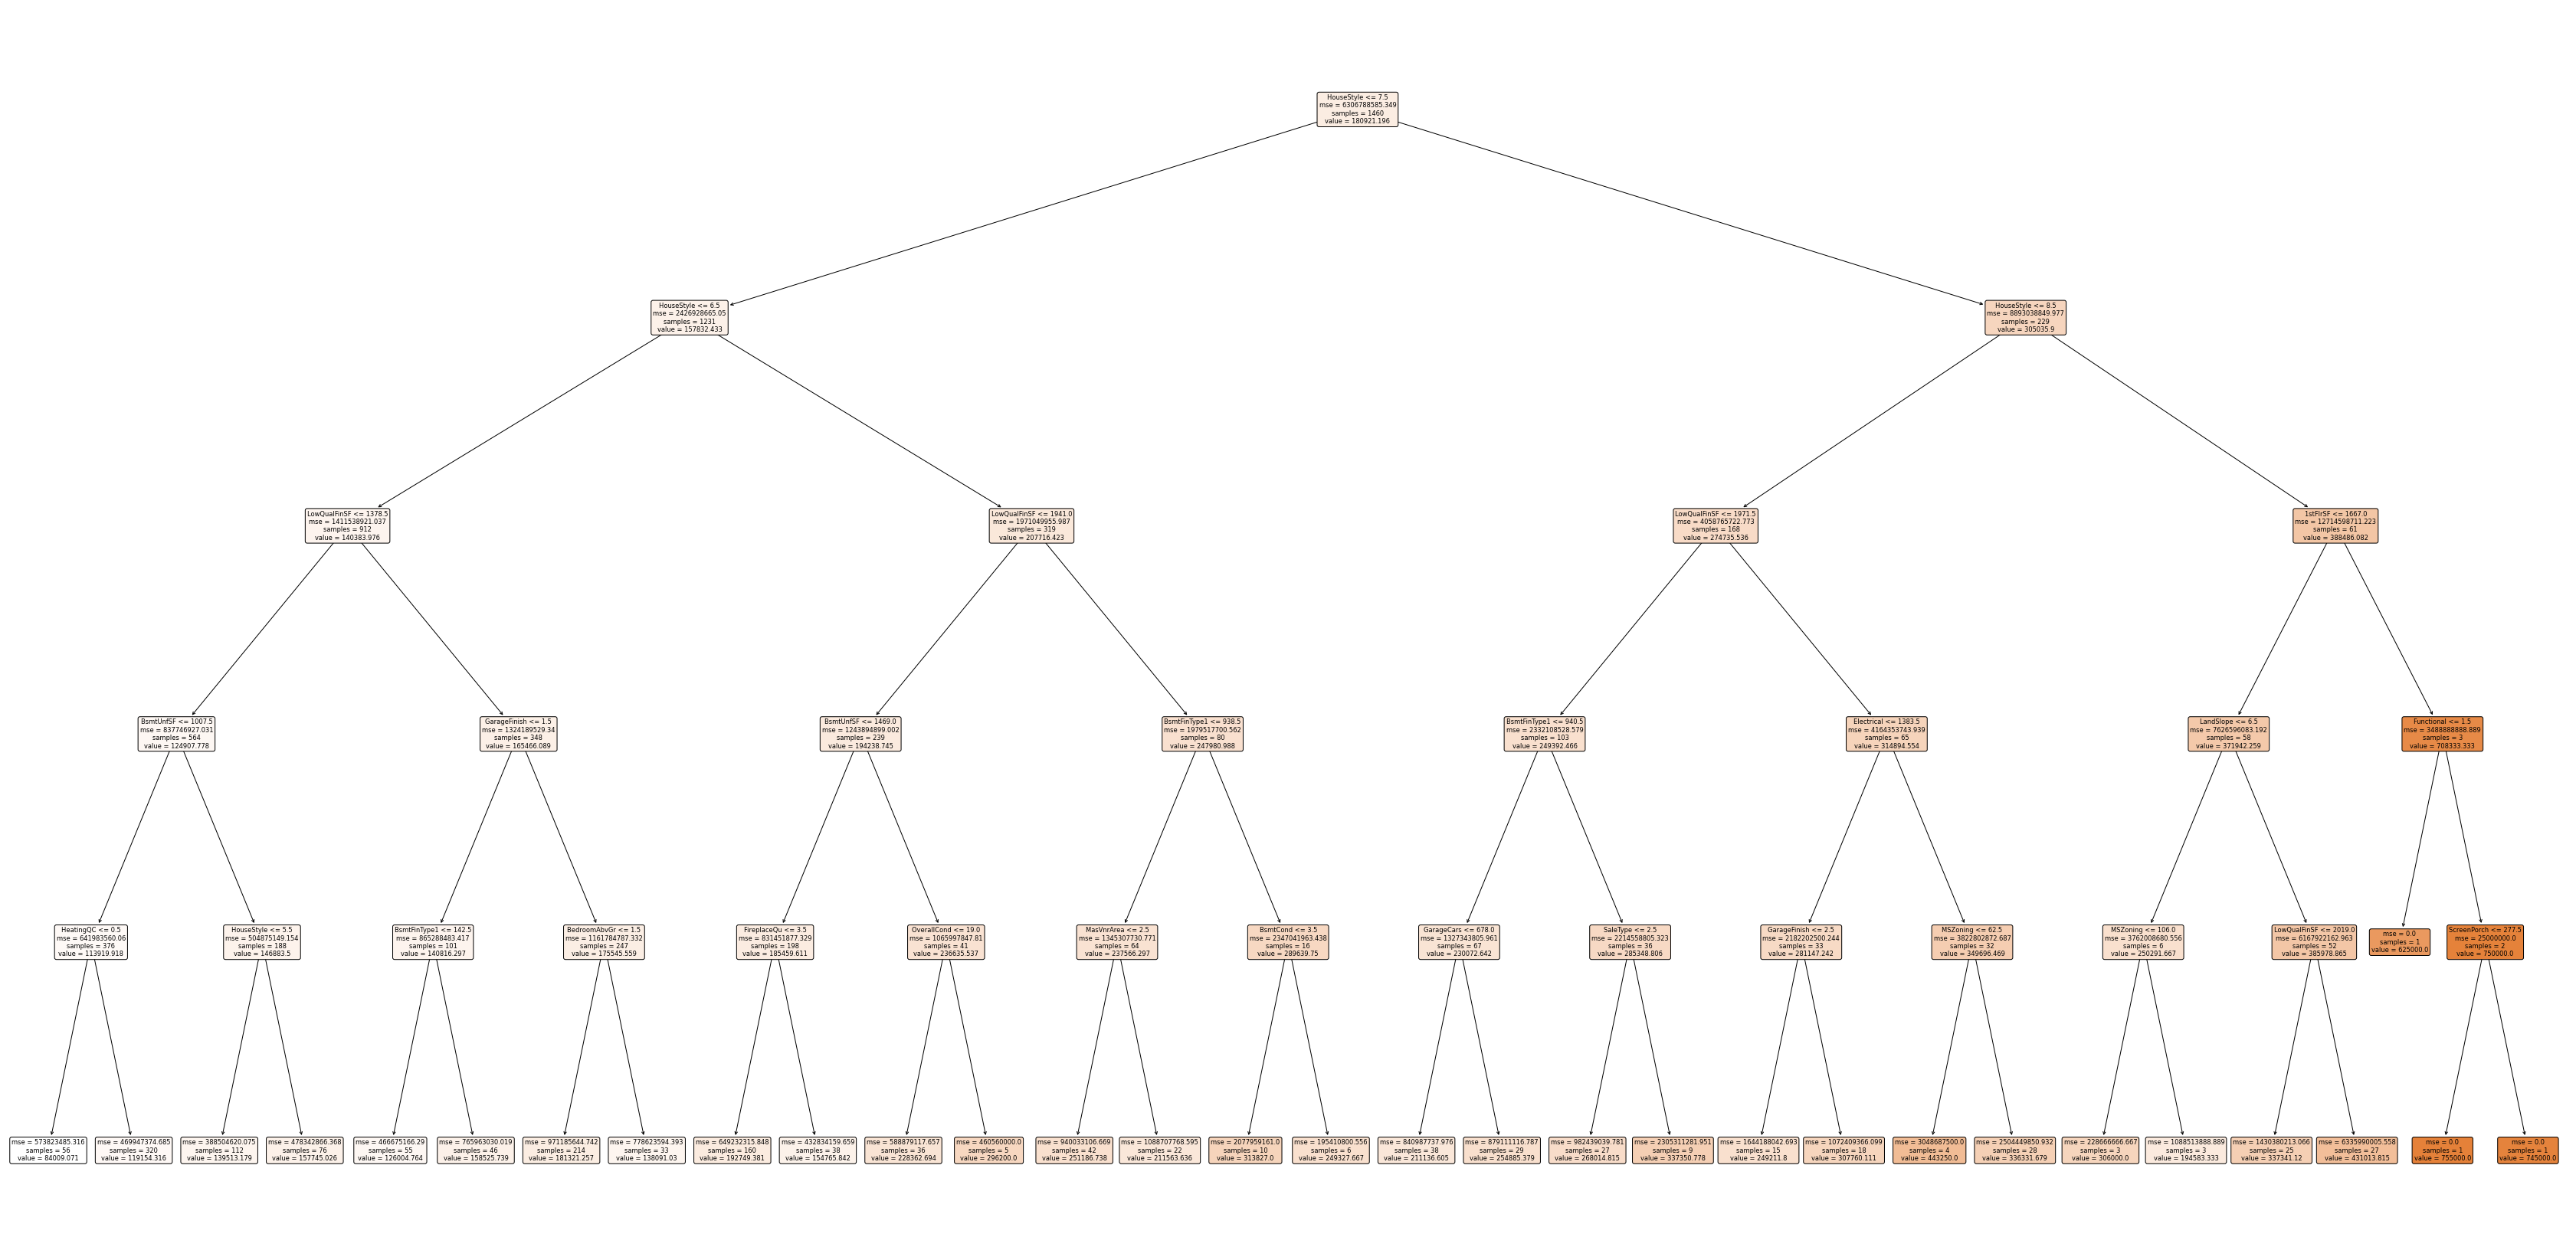

In [167]:
plt_tree(dt)

In [168]:
evaluate_regressor(dt,X_train,y_train)

R-Sqaured 0.8666560086484553
RMSE 28999.52348885819


In [169]:
## Predicting using the DT
test2['SalePrice'] = dt.predict(X_test).reshape(-1,1)
test2[['Id','SalePrice']].to_csv('dt.csv',index=False)

## Random Forest and k-fold validation

In [170]:
rf = RandomForestRegressor(random_state=100,n_jobs=-1)

In [171]:
params = {
    "n_estimators":[10,20,30,50,100,150,200],
    "max_depth":[2,4,3,5,10,15,8,20],
    "min_samples_leaf":[5,10,15,20,30]
}

In [172]:
grid = GridSearchCV(estimator=rf,param_grid=params,scoring='r2',cv=4,n_jobs=-1,verbose=1)

In [173]:
grid.fit(X_train,y_train)

Fitting 4 folds for each of 280 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  8.9min finished


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 3, 5, 10, 15, 8, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'n_estimators': [10, 20, 30, 50, 100, 150, 200]},
             scoring='r2', verbose=1)

In [174]:
grid.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_estimators=150,
                      n_jobs=-1, random_state=100)

In [175]:
rf_best = RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_estimators=150,
                      n_jobs=-1, random_state=100, oob_score=True)

In [176]:
rf_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_estimators=150,
                      n_jobs=-1, oob_score=True, random_state=100)

In [177]:
evaluate_regressor(rf_best,X_train,y_train)

R-Sqaured 0.9383838315779804
RMSE 19712.943658341665


In [178]:
## Predicting using the DT
test2['SalePrice'] = rf_best.predict(X_test).reshape(-1,1)
test2[['Id','SalePrice']].to_csv('rf.csv',index=False)

### Random Forest gives a much better prediction